<a href="https://colab.research.google.com/github/Sunnnyyy16/Dacon_study/blob/main/dacon_movie/movie_audience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DACON 영화 관객수 예측 경진대회

대회 사이트: https://dacon.io/competitions/open/235536/overview/description

# 목차
### 0. 데이터 로드
### 1. 데이터 EDA, visualization
### 2. 데이터 전처리
### 3. 모델 생성 및 학습
### 4. 결론

* 참고

https://dacon.io/competitions/open/235536/codeshare/4158?page=1&dtype=recent

In [1]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,640 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [1]:
#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt

# 브라우저에서 바로 그려지도록 
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# 0.데이터로드

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메시지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
!cp /gdrive/MyDrive/Dacon_study/movie/movies_test.csv ./
!cp /gdrive/MyDrive/Dacon_study/movie/movies_train.csv ./
!cp /gdrive/MyDrive/Dacon_study/movie/submission.csv ./

In [5]:
train = pd.read_csv('movies_train.csv')
test = pd.read_csv('movies_test.csv')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


* title: 영화 제목
* distributor: 배급사
* genre : 장르
* release_time: 개봉일
* time: 상영시간(분)
* screening_rat : 상영등급
* director: 감독이름
* dir_prev_bfnum : 해당감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
* dif_prev_num : 해당감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단, 관객수가 알려지지 않은 영화 제외)
* num_staff : 스텝수
* num_actor: 주연배우수
* box_off_num: 관객수

In [7]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [8]:
print(train.shape)
print(test.shape)

(600, 12)
(243, 11)


데이터 개수가 적은 편

# 1.데이터 EDA, visualization

In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


## Data Cleansing

In [9]:
train.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [10]:
test.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

dir_prev_bfnum(영화 만들기 전 감독 평균 관객수)의 null값이 train, test데이터의 절반이상 차지

In [11]:
# null값 많은 dir_prev_bfnum 삭제
train = train.drop('dir_prev_bfnum',axis=1)
test = test.drop('dir_prev_bfnum',axis=1)

In [12]:
# release_time 데이터 타입 datetime으로 변경
train['release_time'] = pd.to_datetime(train['release_time'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   title          600 non-null    object        
 1   distributor    600 non-null    object        
 2   genre          600 non-null    object        
 3   release_time   600 non-null    datetime64[ns]
 4   time           600 non-null    int64         
 5   screening_rat  600 non-null    object        
 6   director       600 non-null    object        
 7   dir_prev_num   600 non-null    int64         
 8   num_staff      600 non-null    int64         
 9   num_actor      600 non-null    int64         
 10  box_off_num    600 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 51.7+ KB


In [13]:
# 년도, 월 추출
train['release_year'], train['release_month'] = (train['release_time'].dt.year, train['release_time'].dt.month)
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0,91,2,23398,2012,11
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,2,387,3,7072501,2015,11
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,4,343,4,6959083,2013,6
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,2,20,6,217866,2012,7
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1,251,2,483387,2010,11


## 시각화

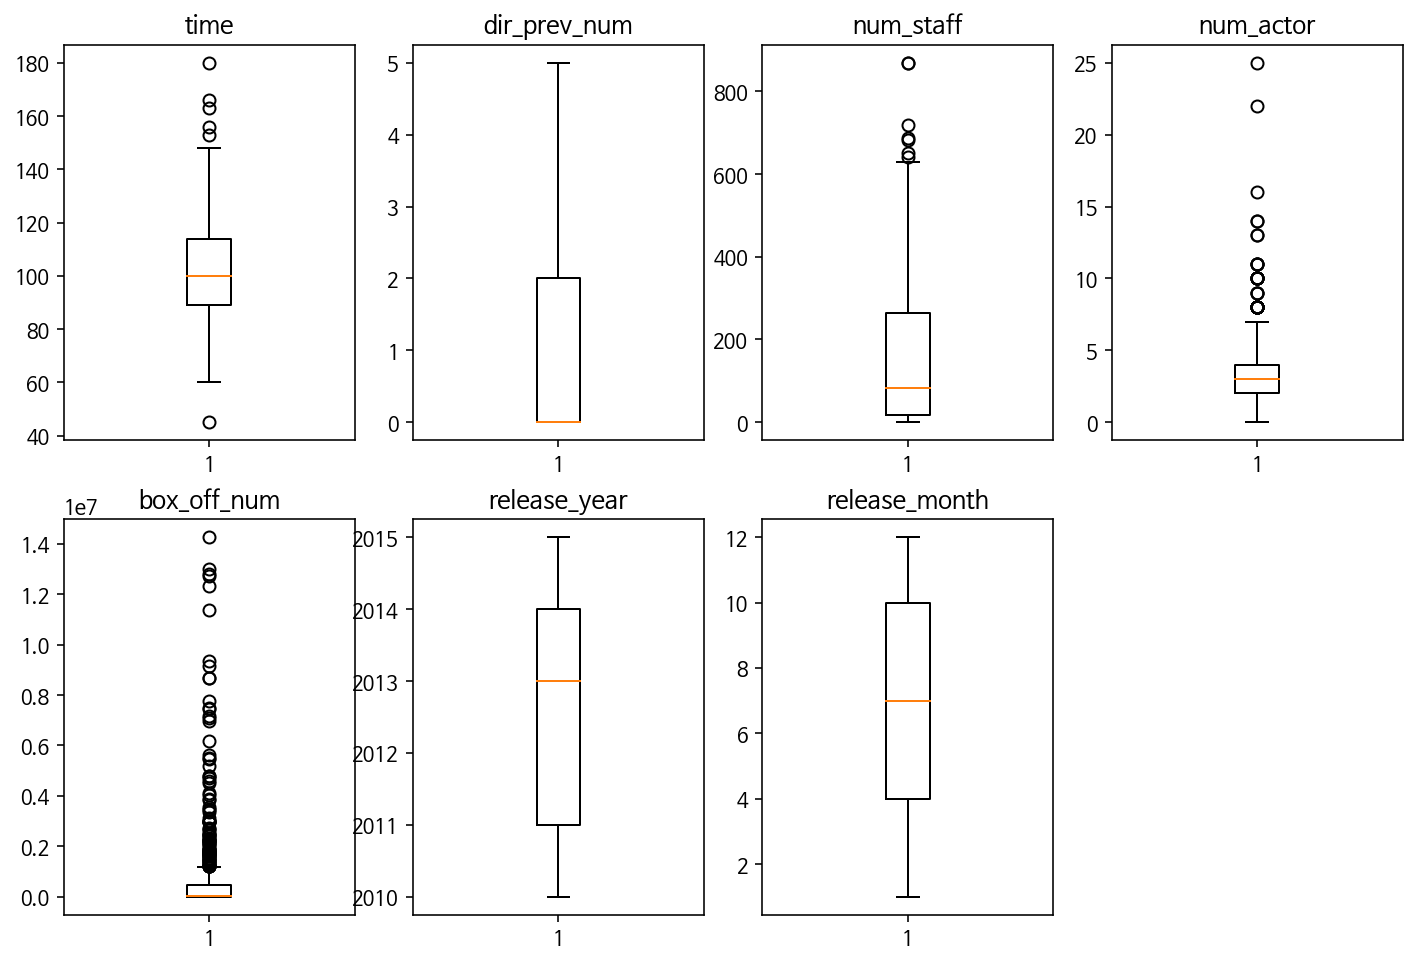

In [ ]:
# boxplot으로 수치 데이터 분포 확인
plt.figure(figsize=(12,8))

cols = train.columns[7:].insert(0,'time')
for i in range(len(cols)):
  plt.subplot(2,4,i+1)
  plt.title(cols[i])
  plt.boxplot(train[cols[i]])
plt.show()

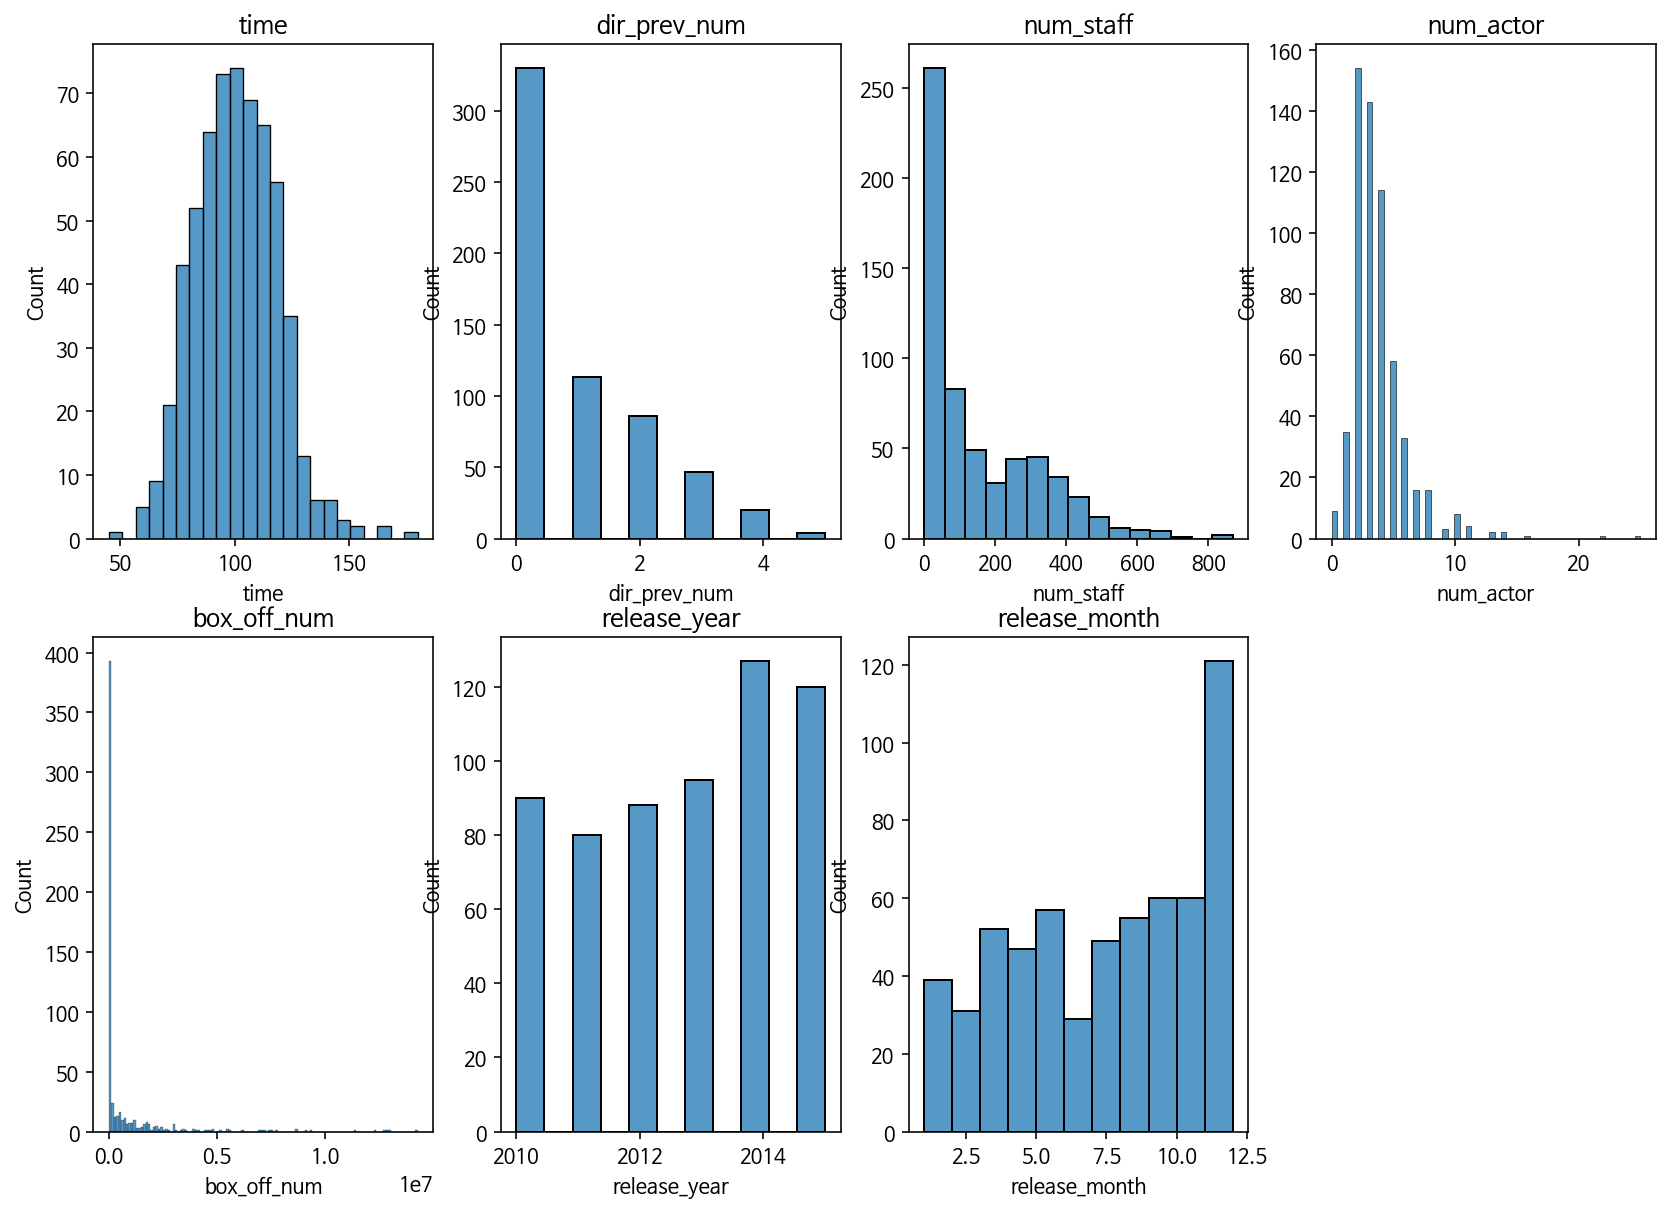

In [ ]:
# histplot으로 수치형 데이터 분포 확인
plt.figure(figsize=(14,10))

cols = train.columns[7:].insert(0,'time')
for i in range(len(cols)):
  plt.subplot(2,4,i+1)
  plt.title(cols[i])
  sns.histplot(train[cols[i]])
plt.show()

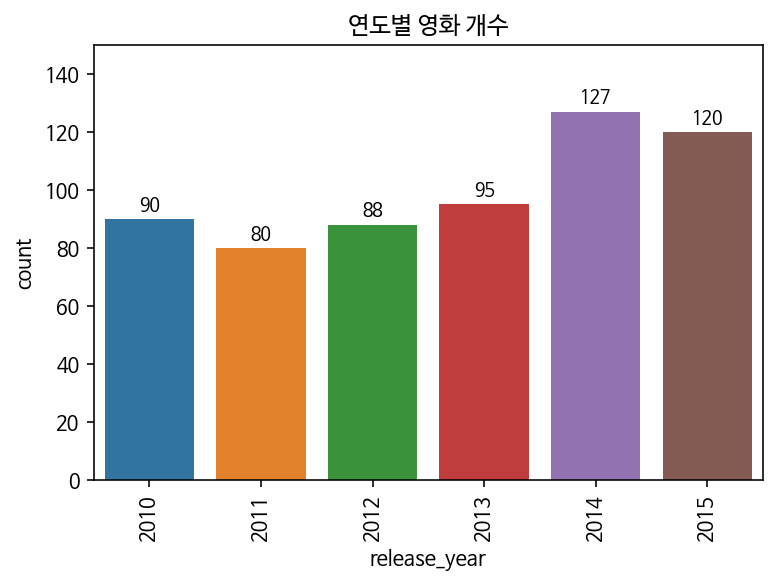

In [ ]:
ax= sns.countplot(x='release_year',data=train)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
ax.set_ylim(0,150)
plt.xticks(rotation=90)

plt.title('연도별 영화 개수')
plt.show()

연도별 영화 개수는 점차 늘어나는 추세

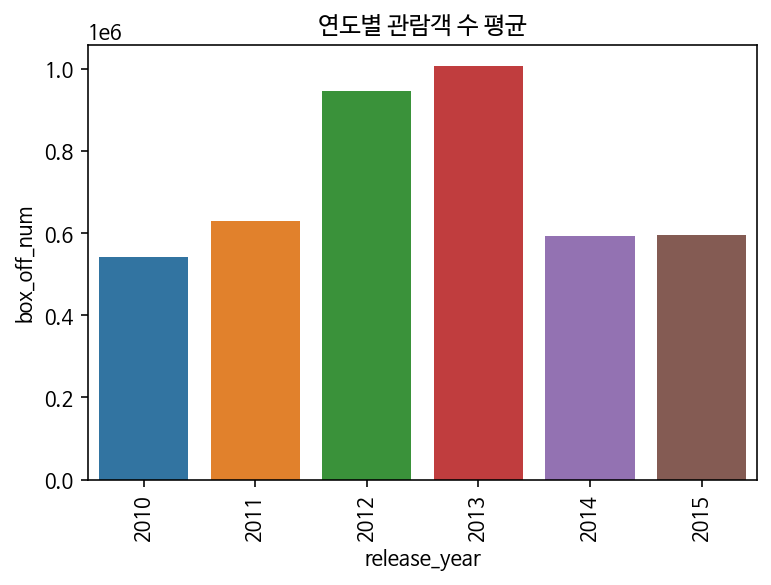

In [ ]:
plt.figure()
sns.barplot(x='release_year',y='box_off_num', data=train.groupby('release_year')['box_off_num'].mean().reset_index())
plt.title('연도별 관람객 수 평균')
plt.show()

연도별 관람객은 2012, 2013년까지 정점을 찍고 2014년 부터 약간 감소

In [ ]:
train['distributor'].value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

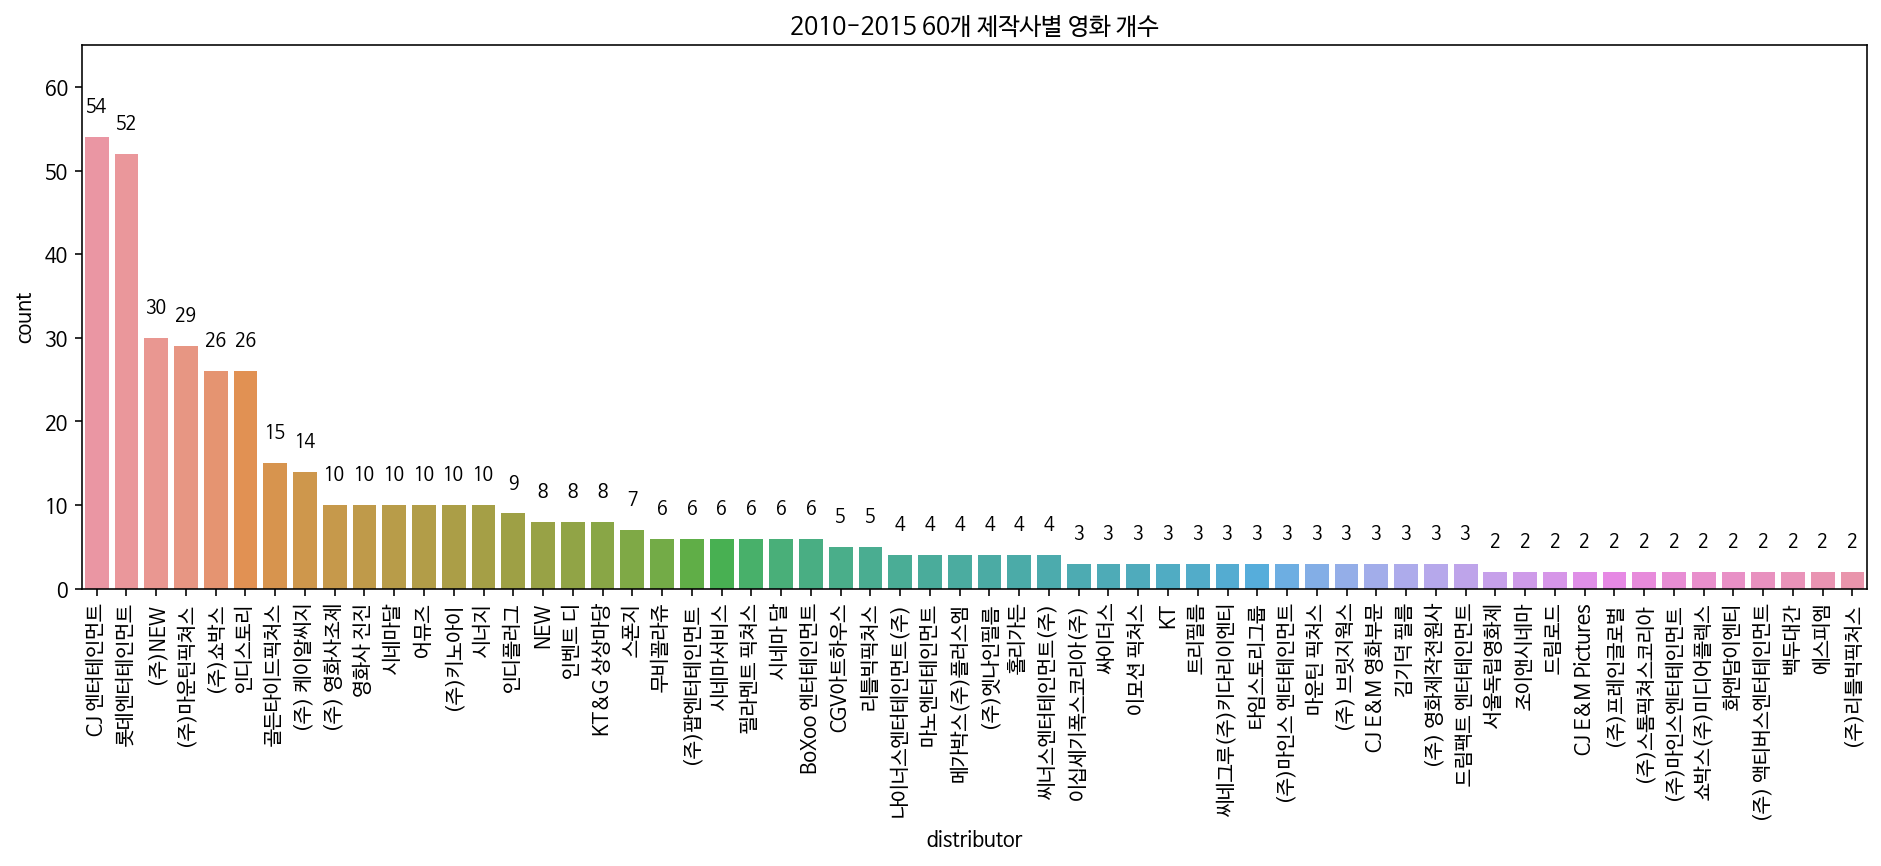

In [ ]:
plt.figure(figsize=(16,5))
ax= sns.countplot(x='distributor',data=train, order=train['distributor'].value_counts().head(60).index)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
ax.set_ylim(0,65)
plt.xticks(rotation=90)

plt.title('2010-2015 60개 제작사별 영화 개수')
plt.show()

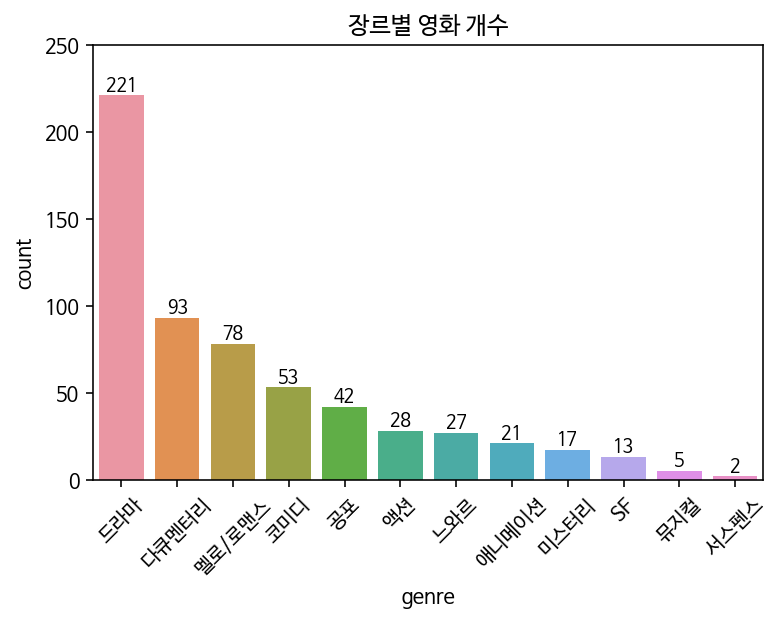

In [ ]:
ax= sns.countplot(x='genre',data=train, order=train['genre'].value_counts().index)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
ax.set_ylim(0,250)
plt.xticks(rotation=45)

plt.title('장르별 영화 개수')
plt.show()

드라마 장르가 가장 많다

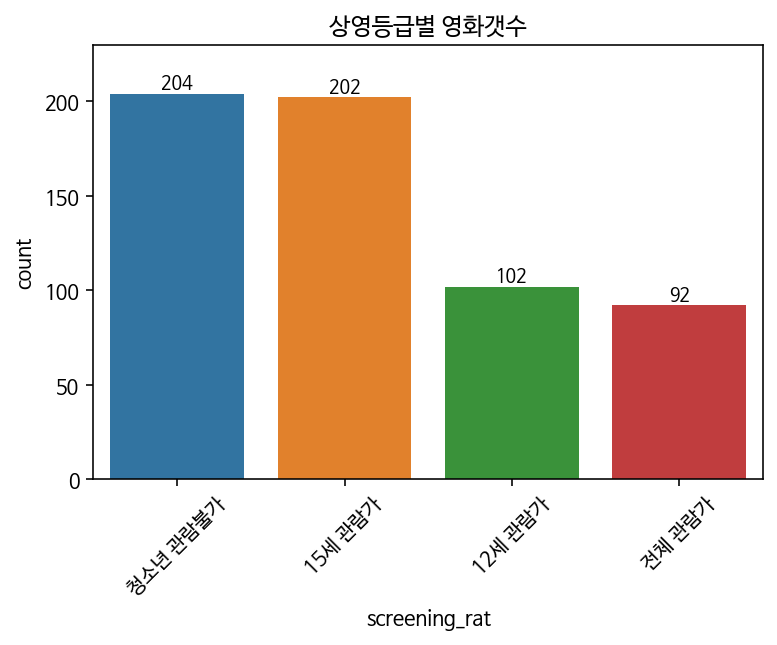

In [ ]:
ax= sns.countplot(x='screening_rat',data=train, order=train['screening_rat'].value_counts().index)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
ax.set_ylim(0,230)
plt.xticks(rotation=45)

plt.title('상영등급별 영화갯수')
plt.show()

청소년 관람불가, 15세 관람가가 가장 많다

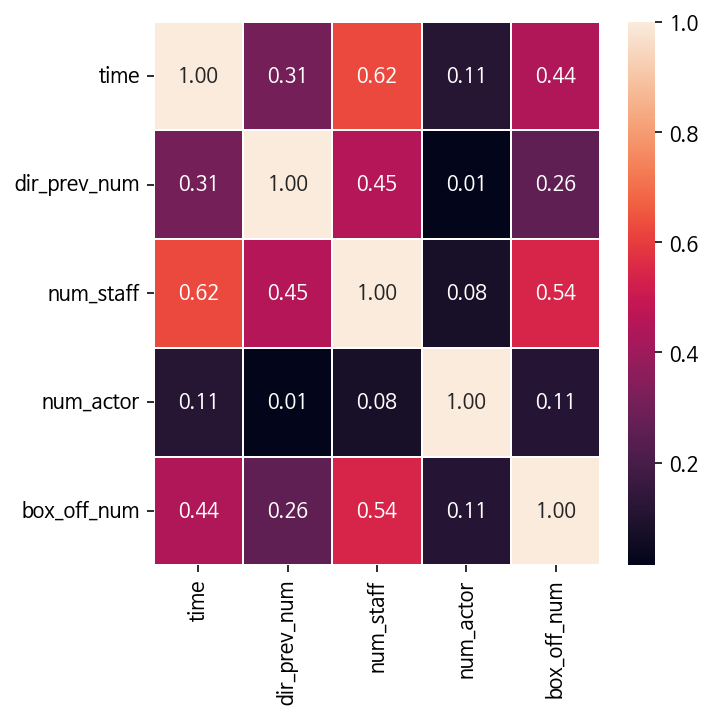

In [ ]:
# 상관계수
plt.figure(figsize=(5,5))
sns.heatmap(data = train.corr(), annot=True, fmt = '.2f', linewidths=.5)

* 관객수(box_off_num)에 주연배수 수(num_actor)는 많은 영향을 주지 않는다. num_actor는 다른 변수와도 상관관계가 낮음.


* 수치형 변수 간 상관관계만 확인한 거라 카테고리형 변수인 상영등급, 장르 포함 상관관계는 알 수 없음 



# 2.데이터 전처리

## feature engineering

In [14]:
# 상위 5개의 배급사를 제외하고 '기타'로 처리
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

## 라벨인코딩

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
# encoder.fit(train['genre'])
# train['genre'] = encoder.transform(train['genre'])
# test['genre'] = encoder.transform(test['genre'])

encoder.fit(train['distributor'])
train['distributor'] = encoder.transform(train['distributor'])
test['distributor'] = encoder.transform(test['distributor'])

encoder.fit(train['screening_rat'])
train['screening_rat'] = encoder.transform(train['screening_rat'])
test['screening_rat'] = encoder.transform(test['screening_rat'])

In [16]:
train['genre_rank'] = train.genre.map({'뮤지컬' : 1, '다큐멘터리' : 2, '서스펜스' : 3, '애니메이션' : 4, '멜로/로맨스' : 5,
                                      '미스터리' : 6, '공포' : 7, '드라마' : 8, '코미디' : 9, 'SF' : 10, '액션' : 11, '느와르' : 12})
test['genre_rank'] = test.genre.map({'뮤지컬' : 1, '다큐멘터리' : 2, '서스펜스' : 3, '애니메이션' : 4, '멜로/로맨스' : 5,
                                      '미스터리' : 6, '공포' : 7, '드라마' : 8, '코미디' : 9, 'SF' : 10, '액션' : 11, '느와르' : 12})

# 3.모델 생성 및 학습

# RandomForest

## train, val 데이터셋 split

In [17]:
X= train.drop(['title','release_time','director','box_off_num','genre'],axis=1)
y=train['box_off_num']

In [18]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(X,y,test_size=.25, random_state=42)

## 학습

In [19]:
# 모델링 라이브러리
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_reg= RandomForestRegressor(n_estimators=200, random_state=42)
rf_reg.fit(train_x,train_y)
pred= rf_reg.predict(val_x)

mse = mean_squared_error(val_y,pred)
rmse = mse**(1/2)

print("RMSE: ",rmse)

RMSE:  1202849.6277478104


## 하이퍼파라미터 튜닝 - optuna

In [20]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 26.4 MB/s 
     |████████████████████████████████| 209 kB 85.2 MB/s 
     |████████████████████████████████| 81 kB 11.0 MB/s 
     |████████████████████████████████| 78 kB 9.1 MB/s 
     |████████████████████████████████| 147 kB 102.7 MB/s 
     |████████████████████████████████| 50 kB 8.0 MB/s 
     |████████████████████████████████| 112 kB 86.9 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=38543902954349e5f110657372baeedb9f997d225b399ac40a6ece5fbee2c0a3
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip


In [21]:
# Optuna Libraries
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

In [22]:
# random sampler
sampler = TPESampler(seed=10)

def objective(trial):

  rf_param = {
      'max_depth':trial.suggest_int('max_depth', 1, 10),
      'max_leaf_nodes':trial.suggest_int('max_leaf_nodes', 2, 1000),
      'n_estimators':trial.suggest_int('n_estimators', 100, 500),
  }
  
  model_rf = RandomForestRegressor(**rf_param)
    
  model_rf = model_rf.fit(train_x, train_y)    
  
  # 평가지표
  MSE = mean_squared_error(val_y, model_rf.predict(val_x))

  return MSE
  
optuna_rf = optuna.create_study(direction='minimize',sampler = sampler)

optuna_rf.optimize(objective, n_trials=100)

[I 2022-12-05 13:58:59,162] A new study created in memory with name: no-name-20a30458-0588-4c9e-80da-cb67f413bb05
[I 2022-12-05 13:58:59,896] Trial 0 finished with value: 1336207880161.2842 and parameters: {'max_depth': 8, 'max_leaf_nodes': 22, 'n_estimators': 354}. Best is trial 0 with value: 1336207880161.2842.
[I 2022-12-05 13:59:00,474] Trial 1 finished with value: 1429361138344.968 and parameters: {'max_depth': 8, 'max_leaf_nodes': 500, 'n_estimators': 190}. Best is trial 0 with value: 1336207880161.2842.
[I 2022-12-05 13:59:00,795] Trial 2 finished with value: 1141214037924.509 and parameters: {'max_depth': 2, 'max_leaf_nodes': 761, 'n_estimators': 167}. Best is trial 2 with value: 1141214037924.509.
[I 2022-12-05 13:59:01,751] Trial 3 finished with value: 1184100503236.0742 and parameters: {'max_depth': 1, 'max_leaf_nodes': 686, 'n_estimators': 482}. Best is trial 2 with value: 1141214037924.509.
[I 2022-12-05 13:59:02,424] Trial 4 finished with value: 1173502366866.5745 and par

In [23]:
rf_trial = optuna_rf.best_trial
rf_trial_params = rf_trial.params
print('Best Trial: score {},\nparams {}'.format(rf_trial.value, rf_trial_params))

Best Trial: score 1030788831967.6663,
params {'max_depth': 3, 'max_leaf_nodes': 587, 'n_estimators': 297}


In [34]:
# Modeling fit
rf_regop = RandomForestRegressor(**rf_trial_params)
rf_study = rf_regop.fit(train_x, train_y)

rf_pred_op = rf_regop.predict(val_x)
mse= mean_squared_error(val_y,rf_pred_op)
rmse= mse**(1/2)

print("RMSE : ", rmse)

RMSE :  1028849.5632841021


# catboost

## 학습

In [25]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [26]:
# 모델링 라이브러리
import catboost as cat
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

In [27]:
cat_reg = CatBoostRegressor(n_estimators=200, random_state=42)

cat_reg.fit(train_x,train_y)
pred = cat_reg.predict(val_x)
mse = mean_squared_error(val_y,pred)
rmse = mse**(1/2)

print("RMSE: ",rmse)

Learning rate set to 0.133552
0:	learn: 1892396.0264963	total: 46.8ms	remaining: 9.31s
1:	learn: 1807026.0196570	total: 47.5ms	remaining: 4.7s
2:	learn: 1726140.4052952	total: 48.1ms	remaining: 3.16s
3:	learn: 1639443.1284085	total: 48.8ms	remaining: 2.39s
4:	learn: 1573231.1945566	total: 52.5ms	remaining: 2.05s
5:	learn: 1516246.9847111	total: 53.8ms	remaining: 1.74s
6:	learn: 1464953.4986453	total: 54.7ms	remaining: 1.51s
7:	learn: 1417702.2652691	total: 56.2ms	remaining: 1.35s
8:	learn: 1370939.0681829	total: 57.7ms	remaining: 1.22s
9:	learn: 1325135.9235649	total: 58.4ms	remaining: 1.11s
10:	learn: 1283788.4508181	total: 59.9ms	remaining: 1.03s
11:	learn: 1259540.8232433	total: 61.2ms	remaining: 959ms
12:	learn: 1226366.2154391	total: 62.5ms	remaining: 899ms
13:	learn: 1197823.6048189	total: 63.8ms	remaining: 848ms
14:	learn: 1161027.9965169	total: 65.1ms	remaining: 803ms
15:	learn: 1123890.9530993	total: 66.4ms	remaining: 763ms
16:	learn: 1103999.5062231	total: 67.7ms	remaining: 7

## 하이퍼파라미터 튜닝 -optuna

In [30]:
# random sampler
sampler = TPESampler(seed=10)

def objective(trial):

  cat_param = {
      'max_depth':trial.suggest_int('max_depth', 2, 12),
      'min_child_samples':trial.suggest_int('min_child_samples', 5, 100),
      'n_estimators':trial.suggest_int('n_estimators', 100, 500),
      'learning_rate':trial.suggest_loguniform('learning_rate',0.01,0.3)
  }
  
  model_cat = CatBoostRegressor(**cat_param)
    
  model_cat = model_cat.fit(train_x, train_y)    
  
  # 평가지표
  MSE = mean_squared_error(val_y, model_cat.predict(val_x))

  return MSE
  
optuna_cat = optuna.create_study(direction='minimize',sampler = sampler)

optuna_cat.optimize(objective, n_trials=100)

[I 2022-12-05 14:28:58,664] A new study created in memory with name: no-name-2ab558b5-dca4-4231-ac35-e0706af0b687


0:	learn: 1910200.0140962	total: 5.55ms	remaining: 1.96s
1:	learn: 1815648.9278942	total: 9.46ms	remaining: 1.67s
2:	learn: 1740470.6323146	total: 13ms	remaining: 1.52s
3:	learn: 1671928.0641049	total: 16.4ms	remaining: 1.44s
4:	learn: 1604166.6012188	total: 20ms	remaining: 1.4s
5:	learn: 1542061.8924584	total: 23.5ms	remaining: 1.36s
6:	learn: 1483514.5480476	total: 27.1ms	remaining: 1.34s
7:	learn: 1435177.0003643	total: 30.9ms	remaining: 1.34s
8:	learn: 1386463.2348771	total: 35.4ms	remaining: 1.36s
9:	learn: 1334915.4387378	total: 39.3ms	remaining: 1.35s
10:	learn: 1283296.4735818	total: 40.6ms	remaining: 1.27s
11:	learn: 1243629.4411981	total: 44.2ms	remaining: 1.26s
12:	learn: 1200817.9410112	total: 47.8ms	remaining: 1.25s
13:	learn: 1164625.0414314	total: 48.4ms	remaining: 1.18s
14:	learn: 1128591.2191705	total: 51.9ms	remaining: 1.17s
15:	learn: 1091923.3558571	total: 55.4ms	remaining: 1.17s
16:	learn: 1059716.1750228	total: 58.9ms	remaining: 1.17s
17:	learn: 1025243.5330459	to

[I 2022-12-05 14:29:00,042] Trial 0 finished with value: 1327022444556.1147 and parameters: {'max_depth': 10, 'min_child_samples': 6, 'n_estimators': 354, 'learning_rate': 0.12766567050674044}. Best is trial 0 with value: 1327022444556.1147.


332:	learn: 20549.4834106	total: 1.2s	remaining: 75.6ms
333:	learn: 20434.0115853	total: 1.2s	remaining: 72ms
334:	learn: 20328.4770589	total: 1.21s	remaining: 68.4ms
335:	learn: 20189.2176332	total: 1.21s	remaining: 64.8ms
336:	learn: 19841.1955521	total: 1.21s	remaining: 61.2ms
337:	learn: 19639.0268464	total: 1.22s	remaining: 57.6ms
338:	learn: 19432.0733408	total: 1.22s	remaining: 54ms
339:	learn: 19241.9251268	total: 1.22s	remaining: 50.4ms
340:	learn: 19110.3027056	total: 1.23s	remaining: 46.8ms
341:	learn: 18893.7834263	total: 1.23s	remaining: 43.2ms
342:	learn: 18815.2612764	total: 1.23s	remaining: 39.6ms
343:	learn: 18634.8931741	total: 1.24s	remaining: 36ms
344:	learn: 18414.7625319	total: 1.24s	remaining: 32.5ms
345:	learn: 18249.8377659	total: 1.25s	remaining: 28.9ms
346:	learn: 18113.7406564	total: 1.25s	remaining: 25.3ms
347:	learn: 17938.5105152	total: 1.25s	remaining: 21.6ms
348:	learn: 17744.4135808	total: 1.26s	remaining: 18ms
349:	learn: 17584.5589832	total: 1.26s	re

[I 2022-12-05 14:29:00,266] Trial 1 finished with value: 1727275327712.1233 and parameters: {'max_depth': 7, 'min_child_samples': 26, 'n_estimators': 179, 'learning_rate': 0.13286056037300167}. Best is trial 0 with value: 1327022444556.1147.


64:	learn: 542439.6837394	total: 65.1ms	remaining: 114ms
65:	learn: 538213.1112002	total: 66.1ms	remaining: 113ms
66:	learn: 537727.6425997	total: 66.8ms	remaining: 112ms
67:	learn: 536484.3480291	total: 67.5ms	remaining: 110ms
68:	learn: 536068.1315102	total: 68ms	remaining: 108ms
69:	learn: 535495.5931797	total: 68.7ms	remaining: 107ms
70:	learn: 532336.7603596	total: 69.4ms	remaining: 106ms
71:	learn: 531514.6756375	total: 70.1ms	remaining: 104ms
72:	learn: 531149.7528624	total: 70.8ms	remaining: 103ms
73:	learn: 530713.7645856	total: 71.4ms	remaining: 101ms
74:	learn: 522597.4767866	total: 72.1ms	remaining: 99.9ms
75:	learn: 522331.0542655	total: 72.7ms	remaining: 98.6ms
76:	learn: 521701.0877172	total: 73.6ms	remaining: 97.5ms
77:	learn: 521359.9910885	total: 74.7ms	remaining: 96.7ms
78:	learn: 510647.2649964	total: 75.8ms	remaining: 95.9ms
79:	learn: 508095.5238755	total: 82.7ms	remaining: 102ms
80:	learn: 498676.5317202	total: 84ms	remaining: 102ms
81:	learn: 498351.6086487	tota

[I 2022-12-05 14:29:00,496] Trial 2 finished with value: 1718935294635.4558 and parameters: {'max_depth': 3, 'min_child_samples': 13, 'n_estimators': 374, 'learning_rate': 0.2560221708894264}. Best is trial 0 with value: 1327022444556.1147.


87:	learn: 730316.2324475	total: 40.2ms	remaining: 131ms
88:	learn: 728817.9572851	total: 41ms	remaining: 131ms
89:	learn: 723972.4826092	total: 41.2ms	remaining: 130ms
90:	learn: 719730.6368147	total: 41.5ms	remaining: 129ms
91:	learn: 716779.1904240	total: 41.7ms	remaining: 128ms
92:	learn: 713733.0111061	total: 41.9ms	remaining: 127ms
93:	learn: 707699.0382926	total: 43.1ms	remaining: 128ms
94:	learn: 705535.8840973	total: 43.4ms	remaining: 127ms
95:	learn: 700788.7268940	total: 43.6ms	remaining: 126ms
96:	learn: 694557.6799437	total: 45.4ms	remaining: 130ms
97:	learn: 689796.3000836	total: 45.8ms	remaining: 129ms
98:	learn: 687792.2432139	total: 46.3ms	remaining: 129ms
99:	learn: 684092.0111522	total: 46.8ms	remaining: 128ms
100:	learn: 682416.6004134	total: 47.2ms	remaining: 128ms
101:	learn: 680753.0341926	total: 47.6ms	remaining: 127ms
102:	learn: 677073.8329122	total: 48ms	remaining: 126ms
103:	learn: 672888.4020768	total: 48.4ms	remaining: 126ms
104:	learn: 668032.3296707	tota

[I 2022-12-05 14:29:00,729] Trial 3 finished with value: 1264979788470.4124 and parameters: {'max_depth': 2, 'min_child_samples': 54, 'n_estimators': 425, 'learning_rate': 0.0803110441567395}. Best is trial 3 with value: 1264979788470.4124.


42:	learn: 1359549.7500039	total: 22.4ms	remaining: 199ms
43:	learn: 1356499.4826118	total: 22.6ms	remaining: 196ms
44:	learn: 1349467.9981726	total: 22.8ms	remaining: 192ms
45:	learn: 1345836.2177169	total: 22.9ms	remaining: 189ms
46:	learn: 1339243.1907902	total: 23.1ms	remaining: 186ms
47:	learn: 1332013.8921851	total: 23.3ms	remaining: 183ms
48:	learn: 1328280.6433510	total: 23.5ms	remaining: 180ms
49:	learn: 1326801.2088718	total: 23.6ms	remaining: 177ms
50:	learn: 1319162.0459922	total: 23.8ms	remaining: 175ms
51:	learn: 1315243.3645082	total: 24ms	remaining: 172ms
52:	learn: 1313896.0148924	total: 24.2ms	remaining: 170ms
53:	learn: 1312660.8868045	total: 24.4ms	remaining: 167ms
54:	learn: 1309126.8280119	total: 24.6ms	remaining: 165ms
55:	learn: 1303484.7561238	total: 24.7ms	remaining: 163ms
56:	learn: 1302349.1177814	total: 24.9ms	remaining: 161ms
57:	learn: 1295960.1234868	total: 25.1ms	remaining: 159ms
58:	learn: 1294811.4713602	total: 25.2ms	remaining: 157ms
59:	learn: 12873

[I 2022-12-05 14:29:01,891] Trial 4 finished with value: 1521576090239.7375 and parameters: {'max_depth': 9, 'min_child_samples': 33, 'n_estimators': 468, 'learning_rate': 0.11363577488646587}. Best is trial 3 with value: 1264979788470.4124.


429:	learn: 17982.1830307	total: 976ms	remaining: 86.3ms
430:	learn: 17782.7939995	total: 981ms	remaining: 84.2ms
431:	learn: 17554.4631334	total: 983ms	remaining: 81.9ms
432:	learn: 17463.4484568	total: 985ms	remaining: 79.6ms
433:	learn: 17337.4949608	total: 987ms	remaining: 77.4ms
434:	learn: 17152.7142658	total: 990ms	remaining: 75.1ms
435:	learn: 17012.3692542	total: 992ms	remaining: 72.8ms
436:	learn: 17005.5256123	total: 993ms	remaining: 70.4ms
437:	learn: 16905.1000200	total: 995ms	remaining: 68.1ms
438:	learn: 16716.1651783	total: 997ms	remaining: 65.9ms
439:	learn: 16590.4172551	total: 999ms	remaining: 63.6ms
440:	learn: 16399.1514162	total: 1s	remaining: 61.3ms
441:	learn: 16260.9407583	total: 1s	remaining: 59ms
442:	learn: 16170.5280838	total: 1s	remaining: 56.8ms
443:	learn: 16043.5061553	total: 1.01s	remaining: 54.5ms
444:	learn: 15860.7584873	total: 1.01s	remaining: 52.2ms
445:	learn: 15745.5330358	total: 1.01s	remaining: 49.9ms
446:	learn: 15638.5277739	total: 1.01s	rem

[I 2022-12-05 14:29:02,195] Trial 5 finished with value: 1627987241910.9155 and parameters: {'max_depth': 7, 'min_child_samples': 18, 'n_estimators': 249, 'learning_rate': 0.0990323514868435}. Best is trial 3 with value: 1264979788470.4124.


0:	learn: 1944827.2402397	total: 601us	remaining: 208ms
1:	learn: 1908590.6030930	total: 1.61ms	remaining: 277ms
2:	learn: 1862241.4386823	total: 2.33ms	remaining: 267ms
3:	learn: 1823559.6420743	total: 2.91ms	remaining: 249ms
4:	learn: 1785877.4930184	total: 3.6ms	remaining: 246ms
5:	learn: 1750069.1836581	total: 4.27ms	remaining: 243ms
6:	learn: 1708127.4977271	total: 6.84ms	remaining: 332ms
7:	learn: 1676340.4935601	total: 7.76ms	remaining: 329ms
8:	learn: 1648726.1539080	total: 8.25ms	remaining: 310ms
9:	learn: 1620926.8232172	total: 16.8ms	remaining: 567ms
10:	learn: 1597268.5346260	total: 17.5ms	remaining: 535ms
11:	learn: 1569210.9134865	total: 18.2ms	remaining: 509ms
12:	learn: 1546971.0560305	total: 18.9ms	remaining: 487ms
13:	learn: 1519230.6115487	total: 19.6ms	remaining: 466ms
14:	learn: 1499039.2172569	total: 20.3ms	remaining: 449ms
15:	learn: 1478296.8363305	total: 21ms	remaining: 434ms
16:	learn: 1457576.5753741	total: 21.7ms	remaining: 421ms
17:	learn: 1432765.3831713	t

[I 2022-12-05 14:29:02,523] Trial 6 finished with value: 1505408800480.6816 and parameters: {'max_depth': 6, 'min_child_samples': 46, 'n_estimators': 347, 'learning_rate': 0.057275304226203264}. Best is trial 3 with value: 1264979788470.4124.


244:	learn: 435639.8590964	total: 179ms	remaining: 74.6ms
245:	learn: 433633.5766251	total: 180ms	remaining: 73.9ms
246:	learn: 432306.8640657	total: 181ms	remaining: 73.3ms
247:	learn: 431498.8123414	total: 182ms	remaining: 72.8ms
248:	learn: 429788.1303558	total: 184ms	remaining: 72.3ms
249:	learn: 428858.3942583	total: 185ms	remaining: 71.8ms
250:	learn: 426896.2011942	total: 188ms	remaining: 71.8ms
251:	learn: 425050.1050043	total: 190ms	remaining: 71.7ms
252:	learn: 423580.8863442	total: 191ms	remaining: 71ms
253:	learn: 422142.1282451	total: 192ms	remaining: 70.4ms
254:	learn: 420834.0583509	total: 193ms	remaining: 69.8ms
255:	learn: 419576.0537331	total: 195ms	remaining: 69.2ms
256:	learn: 417584.2086337	total: 195ms	remaining: 68.3ms
257:	learn: 415936.5488001	total: 196ms	remaining: 67.5ms
258:	learn: 413901.5827441	total: 196ms	remaining: 66.6ms
259:	learn: 412016.9513166	total: 197ms	remaining: 65.8ms
260:	learn: 409635.8459217	total: 197ms	remaining: 64.9ms
261:	learn: 4079

[I 2022-12-05 14:29:03,614] Trial 7 finished with value: 1515797580091.5706 and parameters: {'max_depth': 9, 'min_child_samples': 62, 'n_estimators': 422, 'learning_rate': 0.05895709770563241}. Best is trial 3 with value: 1264979788470.4124.


366:	learn: 124667.1763170	total: 854ms	remaining: 128ms
367:	learn: 124036.7074874	total: 857ms	remaining: 126ms
368:	learn: 123339.6486578	total: 864ms	remaining: 124ms
369:	learn: 122715.5516424	total: 866ms	remaining: 122ms
370:	learn: 121660.9923632	total: 870ms	remaining: 120ms
371:	learn: 121185.0159755	total: 872ms	remaining: 117ms
372:	learn: 120612.9669975	total: 875ms	remaining: 115ms
373:	learn: 120166.5914980	total: 877ms	remaining: 113ms
374:	learn: 119838.1979939	total: 879ms	remaining: 110ms
375:	learn: 119517.8667713	total: 882ms	remaining: 108ms
376:	learn: 119148.5562158	total: 884ms	remaining: 106ms
377:	learn: 118484.9883121	total: 887ms	remaining: 103ms
378:	learn: 118045.1006951	total: 890ms	remaining: 101ms
379:	learn: 117548.6479262	total: 892ms	remaining: 98.6ms
380:	learn: 117115.8252007	total: 894ms	remaining: 96.2ms
381:	learn: 116674.2926042	total: 896ms	remaining: 93.9ms
382:	learn: 115394.7399742	total: 899ms	remaining: 91.5ms
383:	learn: 115046.1680779	

[I 2022-12-05 14:29:04,600] Trial 8 finished with value: 1137813696981.3884 and parameters: {'max_depth': 11, 'min_child_samples': 35, 'n_estimators': 136, 'learning_rate': 0.027808044192725104}. Best is trial 8 with value: 1137813696981.3884.


125:	learn: 767542.7946809	total: 837ms	remaining: 66.4ms
126:	learn: 762752.6512412	total: 845ms	remaining: 59.9ms
127:	learn: 758014.0475863	total: 851ms	remaining: 53.2ms
128:	learn: 753007.2573794	total: 858ms	remaining: 46.6ms
129:	learn: 749587.3532176	total: 859ms	remaining: 39.6ms
130:	learn: 744755.0236453	total: 868ms	remaining: 33.1ms
131:	learn: 740617.3618024	total: 876ms	remaining: 26.5ms
132:	learn: 736019.6422981	total: 884ms	remaining: 19.9ms
133:	learn: 731865.2829254	total: 891ms	remaining: 13.3ms
134:	learn: 727222.2464026	total: 905ms	remaining: 6.71ms
135:	learn: 723041.3381482	total: 913ms	remaining: 0us
0:	learn: 1925979.1277615	total: 293us	remaining: 34.4ms
1:	learn: 1865059.6220954	total: 528us	remaining: 30.6ms
2:	learn: 1822533.8364639	total: 767us	remaining: 29.4ms
3:	learn: 1778705.7611169	total: 971us	remaining: 27.7ms
4:	learn: 1736380.7180952	total: 1.19ms	remaining: 26.8ms
5:	learn: 1698465.2181948	total: 1.39ms	remaining: 25.9ms
6:	learn: 1660289.111

[I 2022-12-05 14:29:04,699] Trial 9 finished with value: 1149813164223.0608 and parameters: {'max_depth': 3, 'min_child_samples': 84, 'n_estimators': 118, 'learning_rate': 0.08415928910432512}. Best is trial 8 with value: 1137813696981.3884.


0:	learn: 1976134.5970467	total: 24.2ms	remaining: 5.83s
1:	learn: 1965927.0613616	total: 41ms	remaining: 4.92s
2:	learn: 1953457.3630298	total: 42.2ms	remaining: 3.36s
3:	learn: 1942174.6659067	total: 42.7ms	remaining: 2.54s
4:	learn: 1933088.3352906	total: 55.3ms	remaining: 2.62s
5:	learn: 1922153.4947012	total: 62ms	remaining: 2.44s
6:	learn: 1910714.8382928	total: 68.4ms	remaining: 2.3s
7:	learn: 1901055.9237891	total: 80.8ms	remaining: 2.36s
8:	learn: 1889656.4946376	total: 83.1ms	remaining: 2.15s
9:	learn: 1879492.5813447	total: 95.3ms	remaining: 2.21s
10:	learn: 1869159.1298044	total: 112ms	remaining: 2.35s
11:	learn: 1859258.8183360	total: 126ms	remaining: 2.42s
12:	learn: 1849090.5020819	total: 143ms	remaining: 2.51s
13:	learn: 1839483.3606989	total: 159ms	remaining: 2.58s
14:	learn: 1830415.6887936	total: 174ms	remaining: 2.63s
15:	learn: 1821814.4965258	total: 186ms	remaining: 2.63s
16:	learn: 1810863.3509191	total: 199ms	remaining: 2.63s
17:	learn: 1801534.7937351	total: 21

[I 2022-12-05 14:29:07,545] Trial 10 finished with value: 992566472069.0083 and parameters: {'max_depth': 12, 'min_child_samples': 98, 'n_estimators': 242, 'learning_rate': 0.0165251198155311}. Best is trial 10 with value: 992566472069.0083.


0:	learn: 1975343.9654391	total: 12.7ms	remaining: 3.03s
1:	learn: 1964338.4588763	total: 26.8ms	remaining: 3.19s
2:	learn: 1950902.8307893	total: 28.6ms	remaining: 2.26s
3:	learn: 1938760.7004449	total: 29.4ms	remaining: 1.74s
4:	learn: 1928744.5480752	total: 45.4ms	remaining: 2.13s
5:	learn: 1917004.1529951	total: 59.4ms	remaining: 2.32s
6:	learn: 1907056.6458290	total: 72.2ms	remaining: 2.4s
7:	learn: 1897253.7875441	total: 87ms	remaining: 2.52s
8:	learn: 1885290.3531228	total: 101ms	remaining: 2.6s
9:	learn: 1871124.0185745	total: 102ms	remaining: 2.35s
10:	learn: 1862259.9734781	total: 116ms	remaining: 2.42s
11:	learn: 1850824.4548768	total: 132ms	remaining: 2.51s
12:	learn: 1841928.5478483	total: 146ms	remaining: 2.55s
13:	learn: 1831754.2855672	total: 161ms	remaining: 2.6s
14:	learn: 1823181.5472108	total: 178ms	remaining: 2.67s
15:	learn: 1813821.8921000	total: 193ms	remaining: 2.7s
16:	learn: 1802929.2279582	total: 207ms	remaining: 2.72s
17:	learn: 1793529.0031135	total: 237ms

[I 2022-12-05 14:29:10,675] Trial 11 finished with value: 1027392673601.3862 and parameters: {'max_depth': 12, 'min_child_samples': 98, 'n_estimators': 240, 'learning_rate': 0.017827881192955905}. Best is trial 10 with value: 992566472069.0083.


237:	learn: 650167.0500006	total: 2.95s	remaining: 24.8ms
238:	learn: 647584.8439287	total: 2.96s	remaining: 12.4ms
239:	learn: 644669.5955470	total: 2.98s	remaining: 0us
0:	learn: 1980049.7217698	total: 13.4ms	remaining: 3.43s
1:	learn: 1973805.9817931	total: 26.4ms	remaining: 3.37s
2:	learn: 1966153.5646029	total: 27.7ms	remaining: 2.34s
3:	learn: 1959188.5704330	total: 28.4ms	remaining: 1.8s
4:	learn: 1953577.2536782	total: 41.7ms	remaining: 2.1s
5:	learn: 1946806.3157063	total: 50.2ms	remaining: 2.1s
6:	learn: 1939701.9766787	total: 63.2ms	remaining: 2.26s
7:	learn: 1933910.7120544	total: 78ms	remaining: 2.43s
8:	learn: 1927533.6371577	total: 96.6ms	remaining: 2.66s
9:	learn: 1920849.2376496	total: 110ms	remaining: 2.72s
10:	learn: 1915197.6610356	total: 123ms	remaining: 2.76s
11:	learn: 1908691.2445981	total: 144ms	remaining: 2.95s
12:	learn: 1902601.8353159	total: 158ms	remaining: 2.96s
13:	learn: 1894392.2140399	total: 159ms	remaining: 2.77s
14:	learn: 1888578.4768002	total: 172

[I 2022-12-05 14:29:14,040] Trial 12 finished with value: 978190726583.5737 and parameters: {'max_depth': 12, 'min_child_samples': 98, 'n_estimators': 257, 'learning_rate': 0.010077518030763764}. Best is trial 12 with value: 978190726583.5737.


0:	learn: 1980028.2947173	total: 12.8ms	remaining: 3.34s
1:	learn: 1973762.8054879	total: 26.9ms	remaining: 3.48s
2:	learn: 1966083.8691643	total: 28.3ms	remaining: 2.43s
3:	learn: 1959094.9632809	total: 29.1ms	remaining: 1.87s
4:	learn: 1953464.3951238	total: 44.6ms	remaining: 2.28s
5:	learn: 1946670.3268511	total: 51.4ms	remaining: 2.18s
6:	learn: 1939541.8111641	total: 63.8ms	remaining: 2.31s
7:	learn: 1933730.9661306	total: 76.6ms	remaining: 2.42s
8:	learn: 1927332.4097503	total: 89.3ms	remaining: 2.5s
9:	learn: 1920625.5584605	total: 104ms	remaining: 2.61s
10:	learn: 1914955.1192184	total: 117ms	remaining: 2.66s
11:	learn: 1908427.1011178	total: 130ms	remaining: 2.69s
12:	learn: 1902317.6344929	total: 143ms	remaining: 2.72s
13:	learn: 1894081.2899094	total: 144ms	remaining: 2.54s
14:	learn: 1888248.4427743	total: 157ms	remaining: 2.58s
15:	learn: 1882291.9071648	total: 169ms	remaining: 2.6s
16:	learn: 1876760.7132932	total: 182ms	remaining: 2.61s
17:	learn: 1870700.9556668	total: 

[I 2022-12-05 14:29:17,117] Trial 13 finished with value: 975568269452.5033 and parameters: {'max_depth': 12, 'min_child_samples': 83, 'n_estimators': 261, 'learning_rate': 0.010112789623123302}. Best is trial 13 with value: 975568269452.5033.


257:	learn: 950139.3688812	total: 2.91s	remaining: 33.9ms
258:	learn: 947192.2344885	total: 2.91s	remaining: 22.5ms
259:	learn: 944514.3766570	total: 2.92s	remaining: 11.2ms
260:	learn: 942251.6886344	total: 2.93s	remaining: 0us
0:	learn: 1979362.3743519	total: 3.56ms	remaining: 1.07s
1:	learn: 1970479.9158419	total: 7.1ms	remaining: 1.06s
2:	learn: 1962468.4193394	total: 10.5ms	remaining: 1.05s
3:	learn: 1954894.0668142	total: 14ms	remaining: 1.04s
4:	learn: 1946429.1155771	total: 17.6ms	remaining: 1.04s
5:	learn: 1939836.3362711	total: 21.1ms	remaining: 1.04s
6:	learn: 1930316.5097077	total: 24.6ms	remaining: 1.04s
7:	learn: 1923669.9947470	total: 29.5ms	remaining: 1.08s
8:	learn: 1914495.6235595	total: 31.1ms	remaining: 1.01s
9:	learn: 1907809.1405132	total: 34.5ms	remaining: 1.01s
10:	learn: 1899845.8746669	total: 37.8ms	remaining: 999ms
11:	learn: 1890659.5205485	total: 38.9ms	remaining: 940ms
12:	learn: 1883985.4917308	total: 42.1ms	remaining: 935ms
13:	learn: 1876151.3029005	tot

[I 2022-12-05 14:29:18,334] Trial 14 finished with value: 993998379989.9031 and parameters: {'max_depth': 10, 'min_child_samples': 77, 'n_estimators': 302, 'learning_rate': 0.011295391477022762}. Best is trial 13 with value: 975568269452.5033.


297:	learn: 806301.8220667	total: 1.1s	remaining: 14.7ms
298:	learn: 804381.0481643	total: 1.1s	remaining: 11.1ms
299:	learn: 801751.9938229	total: 1.11s	remaining: 7.38ms
300:	learn: 799800.7988385	total: 1.11s	remaining: 3.69ms
301:	learn: 798207.4145469	total: 1.11s	remaining: 0us
0:	learn: 1978804.5459812	total: 407us	remaining: 74.2ms
1:	learn: 1970773.3338112	total: 1.01ms	remaining: 91.7ms
2:	learn: 1964414.0315307	total: 1.56ms	remaining: 93.9ms
3:	learn: 1956811.1401161	total: 2.18ms	remaining: 97.7ms
4:	learn: 1949370.9627969	total: 2.52ms	remaining: 89.6ms
5:	learn: 1941385.7732628	total: 2.85ms	remaining: 84.2ms
6:	learn: 1934235.7897687	total: 3.2ms	remaining: 80.4ms
7:	learn: 1927805.5141354	total: 3.52ms	remaining: 77.1ms
8:	learn: 1920956.4871435	total: 3.89ms	remaining: 75.1ms
9:	learn: 1914019.5617131	total: 4.22ms	remaining: 73ms
10:	learn: 1906902.7827679	total: 4.55ms	remaining: 71.2ms
11:	learn: 1898944.0007827	total: 4.89ms	remaining: 69.8ms
12:	learn: 1892537.75

[I 2022-12-05 14:29:18,508] Trial 15 finished with value: 964263610422.5039 and parameters: {'max_depth': 5, 'min_child_samples': 80, 'n_estimators': 183, 'learning_rate': 0.010153723839293772}. Best is trial 15 with value: 964263610422.5039.
[I 2022-12-05 14:29:18,688] Trial 16 finished with value: 1120235343272.3274 and parameters: {'max_depth': 5, 'min_child_samples': 74, 'n_estimators': 184, 'learning_rate': 0.028522647161165985}. Best is trial 15 with value: 964263610422.5039.


0:	learn: 1965551.3371516	total: 925us	remaining: 169ms
1:	learn: 1943562.5479421	total: 1.3ms	remaining: 118ms
2:	learn: 1926390.9428706	total: 2.91ms	remaining: 175ms
3:	learn: 1904167.9428334	total: 3.83ms	remaining: 172ms
4:	learn: 1884878.3028346	total: 4.64ms	remaining: 166ms
5:	learn: 1863791.5479806	total: 5.08ms	remaining: 151ms
6:	learn: 1845611.5515532	total: 5.73ms	remaining: 145ms
7:	learn: 1829332.4729735	total: 6.32ms	remaining: 139ms
8:	learn: 1811388.2902362	total: 6.95ms	remaining: 135ms
9:	learn: 1795403.3948514	total: 7.52ms	remaining: 131ms
10:	learn: 1779311.3698874	total: 8.11ms	remaining: 128ms
11:	learn: 1763478.0697722	total: 8.69ms	remaining: 125ms
12:	learn: 1749409.8297662	total: 9.76ms	remaining: 128ms
13:	learn: 1732845.7056204	total: 10.7ms	remaining: 130ms
14:	learn: 1715428.7045007	total: 11.4ms	remaining: 128ms
15:	learn: 1699546.1440587	total: 12ms	remaining: 126ms
16:	learn: 1688127.0395397	total: 12.6ms	remaining: 124ms
17:	learn: 1670586.1697773	t

[I 2022-12-05 14:29:18,874] Trial 17 finished with value: 1061325661403.7577 and parameters: {'max_depth': 5, 'min_child_samples': 66, 'n_estimators': 187, 'learning_rate': 0.030998379230783486}. Best is trial 15 with value: 964263610422.5039.


37:	learn: 1422936.4041764	total: 24.3ms	remaining: 95.4ms
38:	learn: 1411591.2212237	total: 24.9ms	remaining: 94.3ms
39:	learn: 1403612.8762565	total: 25.3ms	remaining: 93.1ms
40:	learn: 1391997.9508156	total: 25.9ms	remaining: 92.1ms
41:	learn: 1384299.3417919	total: 26.4ms	remaining: 91.1ms
42:	learn: 1379045.3383375	total: 28.8ms	remaining: 96.3ms
43:	learn: 1370668.3855024	total: 29.7ms	remaining: 96.5ms
44:	learn: 1359879.7639188	total: 31.8ms	remaining: 100ms
45:	learn: 1351430.0151248	total: 35.3ms	remaining: 108ms
46:	learn: 1343215.4357236	total: 35.8ms	remaining: 107ms
47:	learn: 1335741.5736678	total: 37.7ms	remaining: 109ms
48:	learn: 1327476.8499726	total: 38.8ms	remaining: 109ms
49:	learn: 1323347.7002399	total: 39.3ms	remaining: 108ms
50:	learn: 1312727.1507250	total: 39.9ms	remaining: 107ms
51:	learn: 1307687.7934631	total: 40.7ms	remaining: 106ms
52:	learn: 1303903.8396674	total: 41.3ms	remaining: 104ms
53:	learn: 1298350.7398061	total: 42.4ms	remaining: 104ms
54:	lea

[I 2022-12-05 14:29:19,129] Trial 18 finished with value: 1086807176959.146 and parameters: {'max_depth': 5, 'min_child_samples': 84, 'n_estimators': 284, 'learning_rate': 0.016054536868928344}. Best is trial 15 with value: 964263610422.5039.


60:	learn: 1478274.8102625	total: 43.1ms	remaining: 157ms
61:	learn: 1472062.7226609	total: 49.3ms	remaining: 176ms
62:	learn: 1464978.1260313	total: 50.4ms	remaining: 177ms
63:	learn: 1459749.0750152	total: 52ms	remaining: 179ms
64:	learn: 1453327.0576905	total: 53.3ms	remaining: 179ms
65:	learn: 1447847.1105734	total: 54ms	remaining: 179ms
66:	learn: 1443720.7753881	total: 59.6ms	remaining: 193ms
67:	learn: 1438689.7409756	total: 60.8ms	remaining: 193ms
68:	learn: 1434511.1598097	total: 63.7ms	remaining: 199ms
69:	learn: 1426695.3379687	total: 65ms	remaining: 199ms
70:	learn: 1420840.9298811	total: 66.4ms	remaining: 199ms
71:	learn: 1416560.8460719	total: 67.6ms	remaining: 199ms
72:	learn: 1410598.8009337	total: 69.3ms	remaining: 200ms
73:	learn: 1406467.5246595	total: 70.9ms	remaining: 201ms
74:	learn: 1400106.1458616	total: 71.8ms	remaining: 200ms
75:	learn: 1396004.8682622	total: 72.4ms	remaining: 198ms
76:	learn: 1391526.7886167	total: 73.1ms	remaining: 196ms
77:	learn: 1387397.6

[I 2022-12-05 14:29:19,500] Trial 19 finished with value: 1502672164823.0906 and parameters: {'max_depth': 8, 'min_child_samples': 87, 'n_estimators': 209, 'learning_rate': 0.04100446627404054}. Best is trial 15 with value: 964263610422.5039.


129:	learn: 625182.5214791	total: 191ms	remaining: 116ms
130:	learn: 619967.3229470	total: 193ms	remaining: 115ms
131:	learn: 617458.0245921	total: 201ms	remaining: 117ms
132:	learn: 615333.3394865	total: 202ms	remaining: 115ms
133:	learn: 611654.4422172	total: 203ms	remaining: 114ms
134:	learn: 608687.0805630	total: 204ms	remaining: 112ms
135:	learn: 606529.0655114	total: 205ms	remaining: 110ms
136:	learn: 603839.5153364	total: 207ms	remaining: 109ms
137:	learn: 601973.4517642	total: 208ms	remaining: 107ms
138:	learn: 598861.4543797	total: 209ms	remaining: 105ms
139:	learn: 597286.6803262	total: 210ms	remaining: 104ms
140:	learn: 593618.7115491	total: 211ms	remaining: 102ms
141:	learn: 591203.2423105	total: 212ms	remaining: 100ms
142:	learn: 588403.3133149	total: 213ms	remaining: 98.5ms
143:	learn: 584626.5090304	total: 215ms	remaining: 96.9ms
144:	learn: 581535.6393463	total: 216ms	remaining: 95.3ms
145:	learn: 580707.1887308	total: 217ms	remaining: 93.5ms
146:	learn: 577628.1544904	

[I 2022-12-05 14:29:19,639] Trial 20 finished with value: 964442979870.5566 and parameters: {'max_depth': 4, 'min_child_samples': 70, 'n_estimators': 140, 'learning_rate': 0.013345819802185212}. Best is trial 15 with value: 964263610422.5039.
[I 2022-12-05 14:29:19,766] Trial 21 finished with value: 981388379324.9797 and parameters: {'max_depth': 4, 'min_child_samples': 71, 'n_estimators': 145, 'learning_rate': 0.013095035537073927}. Best is trial 15 with value: 964263610422.5039.


62:	learn: 1549970.7575109	total: 31.6ms	remaining: 38.6ms
63:	learn: 1544317.0198737	total: 32ms	remaining: 37.9ms
64:	learn: 1538793.9583169	total: 32.3ms	remaining: 37.3ms
65:	learn: 1534793.3438035	total: 32.7ms	remaining: 36.6ms
66:	learn: 1530704.3992383	total: 33.3ms	remaining: 36.2ms
67:	learn: 1526757.4388818	total: 33.6ms	remaining: 35.6ms
68:	learn: 1521262.8232581	total: 34ms	remaining: 34.9ms
69:	learn: 1517438.8971424	total: 34.3ms	remaining: 34.3ms
70:	learn: 1512364.0640684	total: 34.6ms	remaining: 33.7ms
71:	learn: 1508844.9632879	total: 35ms	remaining: 33ms
72:	learn: 1505319.1656937	total: 35.3ms	remaining: 32.4ms
73:	learn: 1501611.5493942	total: 35.6ms	remaining: 31.8ms
74:	learn: 1497485.0586605	total: 36ms	remaining: 31.2ms
75:	learn: 1493355.1410097	total: 36.3ms	remaining: 30.6ms
76:	learn: 1488510.2531426	total: 36.6ms	remaining: 30ms
77:	learn: 1485743.8625403	total: 36.9ms	remaining: 29.4ms
78:	learn: 1481744.9755703	total: 43.2ms	remaining: 33.4ms
79:	learn

[I 2022-12-05 14:29:19,868] Trial 22 finished with value: 995836134853.6168 and parameters: {'max_depth': 4, 'min_child_samples': 57, 'n_estimators': 101, 'learning_rate': 0.023167943553268705}. Best is trial 15 with value: 964263610422.5039.


0:	learn: 1969616.8453320	total: 358us	remaining: 35.9ms
1:	learn: 1953327.3416690	total: 1.2ms	remaining: 59.5ms
2:	learn: 1938299.7676871	total: 1.71ms	remaining: 55.8ms
3:	learn: 1922712.3790658	total: 2.17ms	remaining: 52.5ms
4:	learn: 1907958.0767918	total: 2.64ms	remaining: 50.7ms
5:	learn: 1894641.7944438	total: 3.1ms	remaining: 49.2ms
6:	learn: 1878590.8868195	total: 3.58ms	remaining: 48.1ms
7:	learn: 1861871.1277939	total: 4.04ms	remaining: 46.9ms
8:	learn: 1847968.3247914	total: 4.52ms	remaining: 46.2ms
9:	learn: 1834755.5156079	total: 4.97ms	remaining: 45.2ms
10:	learn: 1821020.4333876	total: 5.45ms	remaining: 44.6ms
11:	learn: 1806605.6329759	total: 5.89ms	remaining: 43.7ms
12:	learn: 1795304.5500024	total: 6.35ms	remaining: 43ms
13:	learn: 1781678.9157951	total: 6.82ms	remaining: 42.4ms
14:	learn: 1768131.4225105	total: 7.26ms	remaining: 41.6ms
15:	learn: 1759244.8881365	total: 7.71ms	remaining: 41ms
16:	learn: 1746207.8662074	total: 8.17ms	remaining: 40.4ms
17:	learn: 173

[I 2022-12-05 14:29:20,059] Trial 23 finished with value: 965941204092.1006 and parameters: {'max_depth': 6, 'min_child_samples': 78, 'n_estimators': 153, 'learning_rate': 0.013176605710669993}. Best is trial 15 with value: 964263610422.5039.


115:	learn: 1273587.1033703	total: 91.5ms	remaining: 29.2ms
116:	learn: 1269769.7049080	total: 92.2ms	remaining: 28.4ms
117:	learn: 1266372.0368786	total: 93.3ms	remaining: 27.7ms
118:	learn: 1263204.1547389	total: 94.6ms	remaining: 27ms
119:	learn: 1257731.1175369	total: 95.9ms	remaining: 26.4ms
120:	learn: 1253470.1620341	total: 97.2ms	remaining: 25.7ms
121:	learn: 1250266.1662200	total: 98.5ms	remaining: 25ms
122:	learn: 1247515.9899723	total: 99.7ms	remaining: 24.3ms
123:	learn: 1243858.4000896	total: 101ms	remaining: 23.6ms
124:	learn: 1240277.3740038	total: 102ms	remaining: 22.9ms
125:	learn: 1237150.3769826	total: 103ms	remaining: 22.2ms
126:	learn: 1234572.6548042	total: 104ms	remaining: 21.3ms
127:	learn: 1232282.7463852	total: 105ms	remaining: 20.4ms
128:	learn: 1229387.1005529	total: 105ms	remaining: 19.6ms
129:	learn: 1227066.5379196	total: 106ms	remaining: 18.8ms
130:	learn: 1223343.5214157	total: 107ms	remaining: 17.9ms
131:	learn: 1220757.7400900	total: 107ms	remaining: 

[I 2022-12-05 14:29:20,224] Trial 24 finished with value: 1101733628076.532 and parameters: {'max_depth': 6, 'min_child_samples': 46, 'n_estimators': 153, 'learning_rate': 0.020644803468039857}. Best is trial 15 with value: 964263610422.5039.
[I 2022-12-05 14:29:20,440] Trial 25 finished with value: 1006723112939.6615 and parameters: {'max_depth': 6, 'min_child_samples': 66, 'n_estimators': 211, 'learning_rate': 0.013855344881364865}. Best is trial 15 with value: 964263610422.5039.


0:	learn: 1976078.7248146	total: 652us	remaining: 137ms
1:	learn: 1966905.4217591	total: 1.43ms	remaining: 150ms
2:	learn: 1954559.8800855	total: 2.13ms	remaining: 148ms
3:	learn: 1941606.6207569	total: 2.83ms	remaining: 147ms
4:	learn: 1928919.7994144	total: 3.53ms	remaining: 146ms
5:	learn: 1917987.3292552	total: 4.23ms	remaining: 144ms
6:	learn: 1908179.8141301	total: 4.91ms	remaining: 143ms
7:	learn: 1897785.1413697	total: 5.58ms	remaining: 142ms
8:	learn: 1888160.0026230	total: 6.26ms	remaining: 141ms
9:	learn: 1877733.8659331	total: 6.96ms	remaining: 140ms
10:	learn: 1867679.5662908	total: 7.67ms	remaining: 139ms
11:	learn: 1857596.9240750	total: 8.33ms	remaining: 138ms
12:	learn: 1848371.4270661	total: 9.03ms	remaining: 138ms
13:	learn: 1838205.2439518	total: 9.72ms	remaining: 137ms
14:	learn: 1830108.6595845	total: 10.4ms	remaining: 136ms
15:	learn: 1821765.8391057	total: 11.1ms	remaining: 135ms
16:	learn: 1813406.2272822	total: 11.8ms	remaining: 135ms
17:	learn: 1805341.872001

[I 2022-12-05 14:29:20,583] Trial 26 finished with value: 1061705747098.6445 and parameters: {'max_depth': 4, 'min_child_samples': 90, 'n_estimators': 161, 'learning_rate': 0.03971919185079934}. Best is trial 15 with value: 964263610422.5039.


0:	learn: 1957901.5691513	total: 399us	remaining: 64ms
1:	learn: 1930658.8791820	total: 686us	remaining: 54.6ms
2:	learn: 1906716.0876263	total: 1.21ms	remaining: 63.6ms
3:	learn: 1881586.9374913	total: 2.25ms	remaining: 88.4ms
4:	learn: 1856351.6672214	total: 2.86ms	remaining: 89.2ms
5:	learn: 1835588.8833024	total: 3.41ms	remaining: 88.2ms
6:	learn: 1809834.7442839	total: 4.06ms	remaining: 89.3ms
7:	learn: 1787516.6599585	total: 4.58ms	remaining: 87.5ms
8:	learn: 1763892.4690464	total: 5.19ms	remaining: 87.7ms
9:	learn: 1745566.1048704	total: 5.78ms	remaining: 87.3ms
10:	learn: 1727855.9083610	total: 6.08ms	remaining: 83ms
11:	learn: 1709162.9303903	total: 6.35ms	remaining: 78.9ms
12:	learn: 1692331.5036496	total: 6.65ms	remaining: 75.7ms
13:	learn: 1672767.8501162	total: 6.92ms	remaining: 72.6ms
14:	learn: 1652757.9500371	total: 7.21ms	remaining: 70.2ms
15:	learn: 1641044.7009466	total: 7.47ms	remaining: 67.7ms
16:	learn: 1623935.5714216	total: 7.75ms	remaining: 65.7ms
17:	learn: 16

[I 2022-12-05 14:29:20,691] Trial 27 finished with value: 958247608758.91 and parameters: {'max_depth': 3, 'min_child_samples': 77, 'n_estimators': 123, 'learning_rate': 0.020961166493595272}. Best is trial 27 with value: 958247608758.91.
[I 2022-12-05 14:29:20,789] Trial 28 finished with value: 968830255476.638 and parameters: {'max_depth': 2, 'min_child_samples': 71, 'n_estimators': 114, 'learning_rate': 0.021213819052716656}. Best is trial 27 with value: 958247608758.91.


0:	learn: 1975872.5213863	total: 264us	remaining: 29.9ms
1:	learn: 1962044.8801746	total: 1.46ms	remaining: 82ms
2:	learn: 1946876.1485681	total: 1.97ms	remaining: 72.8ms
3:	learn: 1935182.8220924	total: 2.49ms	remaining: 68.4ms
4:	learn: 1920325.7472888	total: 2.88ms	remaining: 62.9ms
5:	learn: 1908513.7294236	total: 3.32ms	remaining: 59.8ms
6:	learn: 1895579.5907318	total: 3.87ms	remaining: 59.2ms
7:	learn: 1883081.5312643	total: 4.29ms	remaining: 56.9ms
8:	learn: 1870048.4079604	total: 4.79ms	remaining: 55.9ms
9:	learn: 1857412.0269670	total: 5.14ms	remaining: 53.5ms
10:	learn: 1844663.9180036	total: 5.49ms	remaining: 51.4ms
11:	learn: 1832588.3675465	total: 5.84ms	remaining: 49.7ms
12:	learn: 1821946.4645152	total: 6.2ms	remaining: 48.2ms
13:	learn: 1812602.5252866	total: 6.54ms	remaining: 46.7ms
14:	learn: 1805996.1463825	total: 6.89ms	remaining: 45.5ms
15:	learn: 1795319.2319761	total: 7.23ms	remaining: 44.3ms
16:	learn: 1784548.3304636	total: 7.57ms	remaining: 43.2ms
17:	learn: 

[I 2022-12-05 14:29:20,947] Trial 29 finished with value: 1083349156929.1268 and parameters: {'max_depth': 3, 'min_child_samples': 91, 'n_estimators': 209, 'learning_rate': 0.04120775312373586}. Best is trial 27 with value: 958247608758.91.
[I 2022-12-05 14:29:21,062] Trial 30 finished with value: 972209866055.2694 and parameters: {'max_depth': 2, 'min_child_samples': 61, 'n_estimators': 126, 'learning_rate': 0.014149110687165746}. Best is trial 27 with value: 958247608758.91.


206:	learn: 1041965.6677377	total: 90.7ms	remaining: 876us
207:	learn: 1038810.7008038	total: 91ms	remaining: 437us
208:	learn: 1038245.3323236	total: 91.3ms	remaining: 0us
0:	learn: 1979287.6198520	total: 226us	remaining: 28.3ms
1:	learn: 1969985.4080114	total: 525us	remaining: 32.6ms
2:	learn: 1959716.6459359	total: 1.04ms	remaining: 42.8ms
3:	learn: 1951752.2465717	total: 2.3ms	remaining: 70.1ms
4:	learn: 1941522.1427445	total: 2.72ms	remaining: 65.9ms
5:	learn: 1932814.7485108	total: 3.13ms	remaining: 62.5ms
6:	learn: 1925108.6834065	total: 3.48ms	remaining: 59.2ms
7:	learn: 1916207.1679485	total: 3.84ms	remaining: 56.6ms
8:	learn: 1906832.7803220	total: 4.2ms	remaining: 54.6ms
9:	learn: 1897667.3189005	total: 4.55ms	remaining: 52.8ms
10:	learn: 1888339.8192347	total: 4.94ms	remaining: 51.6ms
11:	learn: 1879394.3785482	total: 5.33ms	remaining: 50.7ms
12:	learn: 1871627.6380448	total: 5.73ms	remaining: 49.8ms
13:	learn: 1865165.7440576	total: 6.08ms	remaining: 48.6ms
14:	learn: 1858

[I 2022-12-05 14:29:21,202] Trial 31 finished with value: 969168106256.63 and parameters: {'max_depth': 4, 'min_child_samples': 78, 'n_estimators': 164, 'learning_rate': 0.012297900858661892}. Best is trial 27 with value: 958247608758.91.
[I 2022-12-05 14:29:21,325] Trial 32 finished with value: 978431247238.7844 and parameters: {'max_depth': 5, 'min_child_samples': 76, 'n_estimators': 101, 'learning_rate': 0.01861037570929077}. Best is trial 27 with value: 958247608758.91.


76:	learn: 1509180.8025953	total: 20.5ms	remaining: 23.2ms
77:	learn: 1506459.0958196	total: 20.9ms	remaining: 23ms
78:	learn: 1503069.9643685	total: 21.5ms	remaining: 23.2ms
79:	learn: 1498251.6613746	total: 21.9ms	remaining: 23ms
80:	learn: 1495089.0134455	total: 22.2ms	remaining: 22.8ms
81:	learn: 1491046.3997206	total: 22.6ms	remaining: 22.6ms
82:	learn: 1487442.5448660	total: 22.9ms	remaining: 22.4ms
83:	learn: 1483697.7099612	total: 23.2ms	remaining: 22.1ms
84:	learn: 1480438.2931115	total: 23.5ms	remaining: 21.8ms
85:	learn: 1477879.3038759	total: 23.8ms	remaining: 21.6ms
86:	learn: 1473471.8949458	total: 24ms	remaining: 21.3ms
87:	learn: 1471391.6729033	total: 24.3ms	remaining: 21ms
88:	learn: 1468500.3215642	total: 24.6ms	remaining: 20.8ms
89:	learn: 1465530.2730182	total: 25ms	remaining: 20.5ms
90:	learn: 1462237.4229817	total: 25.4ms	remaining: 20.4ms
91:	learn: 1458579.8113723	total: 25.7ms	remaining: 20.1ms
92:	learn: 1455995.4116252	total: 26ms	remaining: 19.8ms
93:	learn

[I 2022-12-05 14:29:21,581] Trial 33 finished with value: 1668897879050.4937 and parameters: {'max_depth': 7, 'min_child_samples': 68, 'n_estimators': 183, 'learning_rate': 0.18422762518280467}. Best is trial 27 with value: 958247608758.91.
[I 2022-12-05 14:29:21,700] Trial 34 finished with value: 956177879803.4602 and parameters: {'max_depth': 3, 'min_child_samples': 80, 'n_estimators': 144, 'learning_rate': 0.014358434979972209}. Best is trial 34 with value: 956177879803.4602.


182:	learn: 103547.4266016	total: 184ms	remaining: 0us
0:	learn: 1975703.6187829	total: 377us	remaining: 54ms
1:	learn: 1965678.9087503	total: 1.06ms	remaining: 75.7ms
2:	learn: 1957487.4199305	total: 1.55ms	remaining: 73.1ms
3:	learn: 1946454.1598009	total: 2.02ms	remaining: 70.9ms
4:	learn: 1936996.1391562	total: 2.45ms	remaining: 68.1ms
5:	learn: 1926560.1837391	total: 2.9ms	remaining: 66.7ms
6:	learn: 1916303.7965975	total: 3.31ms	remaining: 64.8ms
7:	learn: 1907191.1022759	total: 3.74ms	remaining: 63.6ms
8:	learn: 1900066.3347965	total: 4.16ms	remaining: 62.4ms
9:	learn: 1890866.6314357	total: 4.56ms	remaining: 61.1ms
10:	learn: 1881436.1011204	total: 5ms	remaining: 60.5ms
11:	learn: 1872297.9857886	total: 5.41ms	remaining: 59.5ms
12:	learn: 1865582.4851362	total: 5.81ms	remaining: 58.5ms
13:	learn: 1856918.5278911	total: 6.21ms	remaining: 57.7ms
14:	learn: 1848294.8780808	total: 6.7ms	remaining: 57.6ms
15:	learn: 1840662.1109937	total: 7.12ms	remaining: 57ms
16:	learn: 1831542.75

[I 2022-12-05 14:29:21,857] Trial 35 finished with value: 973218134420.9846 and parameters: {'max_depth': 3, 'min_child_samples': 49, 'n_estimators': 216, 'learning_rate': 0.015869696395935166}. Best is trial 34 with value: 956177879803.4602.


54:	learn: 1573724.6166767	total: 21.9ms	remaining: 64.1ms
55:	learn: 1571085.3954062	total: 22.2ms	remaining: 63.4ms
56:	learn: 1566524.4198699	total: 22.6ms	remaining: 62.9ms
57:	learn: 1560915.2310253	total: 23.3ms	remaining: 63.4ms
58:	learn: 1555357.7071694	total: 24.6ms	remaining: 65.5ms
59:	learn: 1550858.8237842	total: 25.1ms	remaining: 65.3ms
60:	learn: 1546120.3262677	total: 25.4ms	remaining: 64.4ms
61:	learn: 1542970.2743342	total: 25.6ms	remaining: 63.6ms
62:	learn: 1538499.9494770	total: 25.9ms	remaining: 62.8ms
63:	learn: 1535298.4365912	total: 26.1ms	remaining: 62ms
64:	learn: 1530833.9557138	total: 26.3ms	remaining: 61.2ms
65:	learn: 1528244.7770846	total: 26.6ms	remaining: 60.4ms
66:	learn: 1524465.2406597	total: 26.8ms	remaining: 59.7ms
67:	learn: 1520404.1918049	total: 27.1ms	remaining: 58.9ms
68:	learn: 1516335.2395922	total: 27.3ms	remaining: 58.2ms
69:	learn: 1511730.4542165	total: 27.5ms	remaining: 57.5ms
70:	learn: 1507631.5128055	total: 27.8ms	remaining: 56.7ms

[I 2022-12-05 14:29:21,984] Trial 36 finished with value: 964398270061.6008 and parameters: {'max_depth': 3, 'min_child_samples': 92, 'n_estimators': 132, 'learning_rate': 0.025047380025903}. Best is trial 34 with value: 956177879803.4602.
[I 2022-12-05 14:29:22,112] Trial 37 finished with value: 960798380688.0444 and parameters: {'max_depth': 2, 'min_child_samples': 94, 'n_estimators': 169, 'learning_rate': 0.024023536381160834}. Best is trial 34 with value: 956177879803.4602.


0:	learn: 1974518.8327859	total: 215us	remaining: 36.2ms
1:	learn: 1958913.3567589	total: 1.12ms	remaining: 93.7ms
2:	learn: 1941837.2799000	total: 1.33ms	remaining: 73.4ms
3:	learn: 1928705.9793734	total: 1.55ms	remaining: 63.8ms
4:	learn: 1912094.8600824	total: 1.74ms	remaining: 57.2ms
5:	learn: 1898935.1049395	total: 1.96ms	remaining: 53.3ms
6:	learn: 1884580.6370673	total: 2.16ms	remaining: 50ms
7:	learn: 1870747.3685326	total: 2.35ms	remaining: 47.4ms
8:	learn: 1856387.1606762	total: 2.55ms	remaining: 45.4ms
9:	learn: 1842529.4381608	total: 2.77ms	remaining: 44ms
10:	learn: 1828598.5682699	total: 2.96ms	remaining: 42.6ms
11:	learn: 1815463.8155857	total: 3.17ms	remaining: 41.5ms
12:	learn: 1803879.3901869	total: 3.37ms	remaining: 40.4ms
13:	learn: 1792253.2657200	total: 3.58ms	remaining: 39.7ms
14:	learn: 1785142.3393534	total: 3.78ms	remaining: 38.8ms
15:	learn: 1773471.7958618	total: 3.94ms	remaining: 37.7ms
16:	learn: 1762028.4811171	total: 4.12ms	remaining: 36.8ms
17:	learn: 1

[I 2022-12-05 14:29:22,305] Trial 38 finished with value: 1078075724208.9712 and parameters: {'max_depth': 2, 'min_child_samples': 94, 'n_estimators': 318, 'learning_rate': 0.03573088561885702}. Best is trial 34 with value: 956177879803.4602.


155:	learn: 1265965.1281913	total: 61.3ms	remaining: 63.6ms
156:	learn: 1265531.9334565	total: 61.5ms	remaining: 63ms
157:	learn: 1265156.1085284	total: 61.6ms	remaining: 62.4ms
158:	learn: 1264823.0731385	total: 61.8ms	remaining: 61.8ms
159:	learn: 1263624.5255431	total: 62ms	remaining: 61.3ms
160:	learn: 1263305.8274206	total: 62.2ms	remaining: 60.7ms
161:	learn: 1262769.3452036	total: 62.4ms	remaining: 60.1ms
162:	learn: 1262195.7731082	total: 62.5ms	remaining: 59.5ms
163:	learn: 1261469.8888747	total: 62.7ms	remaining: 58.9ms
164:	learn: 1261058.5819757	total: 62.9ms	remaining: 58.3ms
165:	learn: 1259833.5086777	total: 63.1ms	remaining: 57.7ms
166:	learn: 1258783.7933931	total: 63.2ms	remaining: 57.2ms
167:	learn: 1258167.1872088	total: 63.4ms	remaining: 56.6ms
168:	learn: 1257646.7668206	total: 63.6ms	remaining: 56.1ms
169:	learn: 1257370.6327441	total: 63.8ms	remaining: 55.5ms
170:	learn: 1256773.8928354	total: 63.9ms	remaining: 55ms
171:	learn: 1256335.0769119	total: 64.1ms	rema

[I 2022-12-05 14:29:22,536] Trial 39 finished with value: 967201698678.6923 and parameters: {'max_depth': 2, 'min_child_samples': 83, 'n_estimators': 396, 'learning_rate': 0.019039636536077723}. Best is trial 34 with value: 956177879803.4602.


190:	learn: 1347121.1635210	total: 80ms	remaining: 85.9ms
191:	learn: 1346767.5464826	total: 81ms	remaining: 86.1ms
192:	learn: 1345948.9521993	total: 81.6ms	remaining: 85.9ms
193:	learn: 1344519.0325241	total: 82.4ms	remaining: 85.8ms
194:	learn: 1343969.8838435	total: 82.9ms	remaining: 85.5ms
195:	learn: 1342320.8284930	total: 84.3ms	remaining: 86ms
196:	learn: 1341618.1815849	total: 87ms	remaining: 87.8ms
197:	learn: 1340550.7130812	total: 87.2ms	remaining: 87.2ms
198:	learn: 1339821.4197437	total: 87.3ms	remaining: 86.5ms
199:	learn: 1339480.1319120	total: 87.5ms	remaining: 85.8ms
200:	learn: 1338970.2252931	total: 87.7ms	remaining: 85.1ms
201:	learn: 1338207.2218312	total: 87.9ms	remaining: 84.4ms
202:	learn: 1337259.0838773	total: 88.1ms	remaining: 83.7ms
203:	learn: 1336804.4559181	total: 88.2ms	remaining: 83ms
204:	learn: 1335896.2239723	total: 88.4ms	remaining: 82.4ms
205:	learn: 1335007.1420764	total: 88.6ms	remaining: 81.7ms
206:	learn: 1334291.8467896	total: 88.8ms	remainin

[I 2022-12-05 14:29:22,675] Trial 40 finished with value: 986862209747.5188 and parameters: {'max_depth': 3, 'min_child_samples': 88, 'n_estimators': 170, 'learning_rate': 0.032527504936374727}. Best is trial 34 with value: 956177879803.4602.
[I 2022-12-05 14:29:22,827] Trial 41 finished with value: 991288680752.4127 and parameters: {'max_depth': 3, 'min_child_samples': 92, 'n_estimators': 197, 'learning_rate': 0.024362083478944252}. Best is trial 34 with value: 956177879803.4602.


117:	learn: 1221039.1913745	total: 56.5ms	remaining: 24.9ms
118:	learn: 1220315.7636104	total: 56.8ms	remaining: 24.3ms
119:	learn: 1217400.0245948	total: 57.1ms	remaining: 23.8ms
120:	learn: 1215612.1329161	total: 57.4ms	remaining: 23.2ms
121:	learn: 1214266.9071274	total: 57.7ms	remaining: 22.7ms
122:	learn: 1212208.1119838	total: 57.9ms	remaining: 22.1ms
123:	learn: 1209665.1519824	total: 58.3ms	remaining: 21.6ms
124:	learn: 1206826.6911361	total: 58.7ms	remaining: 21.1ms
125:	learn: 1206359.6827552	total: 59.4ms	remaining: 20.7ms
126:	learn: 1203660.3656324	total: 59.9ms	remaining: 20.3ms
127:	learn: 1202695.8663413	total: 60.4ms	remaining: 19.8ms
128:	learn: 1199852.0105670	total: 60.7ms	remaining: 19.3ms
129:	learn: 1198664.0059957	total: 61.4ms	remaining: 18.9ms
130:	learn: 1194972.9486982	total: 61.7ms	remaining: 18.4ms
131:	learn: 1194054.3610902	total: 62ms	remaining: 17.8ms
132:	learn: 1192586.6839164	total: 62.2ms	remaining: 17.3ms
133:	learn: 1189987.8912405	total: 62.5ms	

[I 2022-12-05 14:29:22,936] Trial 42 finished with value: 982388393048.069 and parameters: {'max_depth': 3, 'min_child_samples': 100, 'n_estimators': 127, 'learning_rate': 0.02465363766230542}. Best is trial 34 with value: 956177879803.4602.


0:	learn: 1968244.7923965	total: 297us	remaining: 37.4ms
1:	learn: 1950885.2075877	total: 1.24ms	remaining: 77.7ms
2:	learn: 1935797.2354044	total: 1.72ms	remaining: 71.1ms
3:	learn: 1917634.6788030	total: 1.9ms	remaining: 58.4ms
4:	learn: 1903200.1273294	total: 2.07ms	remaining: 50.5ms
5:	learn: 1886098.4876156	total: 2.35ms	remaining: 47.5ms
6:	learn: 1869474.4525425	total: 2.62ms	remaining: 44.9ms
7:	learn: 1855080.8685066	total: 2.86ms	remaining: 42.5ms
8:	learn: 1842037.2684504	total: 3.1ms	remaining: 40.6ms
9:	learn: 1830264.2690586	total: 4.23ms	remaining: 49.5ms
10:	learn: 1816971.8749260	total: 4.63ms	remaining: 48.8ms
11:	learn: 1802048.6246578	total: 4.83ms	remaining: 46.3ms
12:	learn: 1789665.1489907	total: 5.01ms	remaining: 43.9ms
13:	learn: 1776622.5732067	total: 5.18ms	remaining: 41.8ms
14:	learn: 1764540.7304437	total: 5.59ms	remaining: 41.8ms
15:	learn: 1750145.4844881	total: 6ms	remaining: 41.6ms
16:	learn: 1737129.4036094	total: 6.39ms	remaining: 41.3ms
17:	learn: 17

[I 2022-12-05 14:29:23,093] Trial 43 finished with value: 1036329413926.2927 and parameters: {'max_depth': 2, 'min_child_samples': 94, 'n_estimators': 227, 'learning_rate': 0.052743683851154216}. Best is trial 34 with value: 956177879803.4602.


201:	learn: 1148670.9603952	total: 74.3ms	remaining: 9.2ms
202:	learn: 1147402.4052556	total: 74.5ms	remaining: 8.81ms
203:	learn: 1145294.7440944	total: 74.7ms	remaining: 8.42ms
204:	learn: 1144080.5136473	total: 74.9ms	remaining: 8.04ms
205:	learn: 1143325.3458726	total: 75.1ms	remaining: 7.66ms
206:	learn: 1141905.5371960	total: 75.3ms	remaining: 7.27ms
207:	learn: 1141167.6324684	total: 75.5ms	remaining: 6.89ms
208:	learn: 1140941.8502194	total: 75.7ms	remaining: 6.51ms
209:	learn: 1140222.9373590	total: 75.8ms	remaining: 6.14ms
210:	learn: 1138258.3954072	total: 76ms	remaining: 5.76ms
211:	learn: 1135926.6973309	total: 76.9ms	remaining: 5.44ms
212:	learn: 1134456.7957236	total: 77.1ms	remaining: 5.07ms
213:	learn: 1133183.7193466	total: 77.3ms	remaining: 4.7ms
214:	learn: 1131861.4755709	total: 77.5ms	remaining: 4.33ms
215:	learn: 1131173.5611133	total: 77.7ms	remaining: 3.96ms
216:	learn: 1129341.5304723	total: 77.9ms	remaining: 3.59ms
217:	learn: 1129125.5085455	total: 78ms	rema

[I 2022-12-05 14:29:23,391] Trial 44 finished with value: 1480776306824.1973 and parameters: {'max_depth': 3, 'min_child_samples': 81, 'n_estimators': 488, 'learning_rate': 0.2833622898053692}. Best is trial 34 with value: 956177879803.4602.


283:	learn: 296897.0096824	total: 118ms	remaining: 84.5ms
284:	learn: 296419.9366788	total: 118ms	remaining: 84ms
285:	learn: 295635.9237304	total: 118ms	remaining: 83.5ms
286:	learn: 293238.3537662	total: 119ms	remaining: 83ms
287:	learn: 291362.0846948	total: 119ms	remaining: 82.5ms
288:	learn: 290659.6960409	total: 120ms	remaining: 82.6ms
289:	learn: 290192.6216093	total: 120ms	remaining: 82ms
290:	learn: 289954.8509487	total: 121ms	remaining: 82.1ms
291:	learn: 288731.9255589	total: 122ms	remaining: 81.8ms
292:	learn: 288239.7356860	total: 122ms	remaining: 81.5ms
293:	learn: 288155.3109180	total: 123ms	remaining: 81.1ms
294:	learn: 288040.0203204	total: 123ms	remaining: 80.7ms
295:	learn: 287228.5655808	total: 124ms	remaining: 80.4ms
296:	learn: 286795.0128056	total: 124ms	remaining: 80ms
297:	learn: 284776.8053845	total: 128ms	remaining: 81.5ms
298:	learn: 284709.2347970	total: 128ms	remaining: 80.9ms
299:	learn: 284188.9725658	total: 128ms	remaining: 80.4ms
300:	learn: 284047.735

[I 2022-12-05 14:29:23,528] Trial 45 finished with value: 953761149877.6769 and parameters: {'max_depth': 4, 'min_child_samples': 39, 'n_estimators': 134, 'learning_rate': 0.015937076386516928}. Best is trial 45 with value: 953761149877.6769.
[I 2022-12-05 14:29:23,672] Trial 46 finished with value: 953335053100.8054 and parameters: {'max_depth': 4, 'min_child_samples': 24, 'n_estimators': 172, 'learning_rate': 0.011196838930166219}. Best is trial 46 with value: 953335053100.8054.


84:	learn: 1409539.1914260	total: 44.9ms	remaining: 25.9ms
85:	learn: 1406750.9378157	total: 45.2ms	remaining: 25.2ms
86:	learn: 1402140.4213984	total: 45.6ms	remaining: 24.6ms
87:	learn: 1399968.5001982	total: 45.9ms	remaining: 24ms
88:	learn: 1397229.0805733	total: 46.8ms	remaining: 23.7ms
89:	learn: 1395038.1733800	total: 47.3ms	remaining: 23.1ms
90:	learn: 1390977.9851101	total: 47.6ms	remaining: 22.5ms
91:	learn: 1387035.4046604	total: 48.6ms	remaining: 22.2ms
92:	learn: 1384555.1978983	total: 48.9ms	remaining: 21.6ms
93:	learn: 1380716.2369764	total: 49.4ms	remaining: 21ms
94:	learn: 1377916.1297564	total: 49.8ms	remaining: 20.4ms
95:	learn: 1372254.5873121	total: 50.2ms	remaining: 19.9ms
96:	learn: 1369243.0171690	total: 50.6ms	remaining: 19.3ms
97:	learn: 1365152.7373912	total: 50.9ms	remaining: 18.7ms
98:	learn: 1361672.9500730	total: 51.3ms	remaining: 18.1ms
99:	learn: 1358025.8241444	total: 51.6ms	remaining: 17.5ms
100:	learn: 1354769.8215214	total: 51.9ms	remaining: 17ms
10

[I 2022-12-05 14:29:23,788] Trial 47 finished with value: 973459881991.0513 and parameters: {'max_depth': 4, 'min_child_samples': 25, 'n_estimators': 114, 'learning_rate': 0.016950223379633863}. Best is trial 46 with value: 953335053100.8054.


0:	learn: 1974042.7188007	total: 368us	remaining: 41.6ms
1:	learn: 1962014.8903303	total: 653us	remaining: 36.6ms
2:	learn: 1950884.6789559	total: 950us	remaining: 35.2ms
3:	learn: 1939226.7430210	total: 1.22ms	remaining: 33.6ms
4:	learn: 1928103.4279220	total: 1.55ms	remaining: 33.9ms
5:	learn: 1918032.1776516	total: 1.88ms	remaining: 33.9ms
6:	learn: 1904865.0505655	total: 2.14ms	remaining: 32.8ms
7:	learn: 1894994.5453304	total: 2.4ms	remaining: 31.8ms
8:	learn: 1884250.3266234	total: 2.71ms	remaining: 31.6ms
9:	learn: 1874014.3031461	total: 3ms	remaining: 31.2ms
10:	learn: 1863368.5581181	total: 3.25ms	remaining: 30.5ms
11:	learn: 1853502.5957170	total: 3.52ms	remaining: 30ms
12:	learn: 1844615.3949732	total: 3.78ms	remaining: 29.4ms
13:	learn: 1831573.2382174	total: 4.06ms	remaining: 29ms
14:	learn: 1819422.3217389	total: 4.32ms	remaining: 28.5ms
15:	learn: 1812465.3442310	total: 4.6ms	remaining: 28.2ms
16:	learn: 1802352.9694480	total: 4.86ms	remaining: 27.7ms
17:	learn: 1791392.

[I 2022-12-05 14:29:23,918] Trial 48 finished with value: 957693134987.936 and parameters: {'max_depth': 2, 'min_child_samples': 38, 'n_estimators': 165, 'learning_rate': 0.011545328212691613}. Best is trial 46 with value: 953335053100.8054.


0:	learn: 1977971.8954243	total: 341us	remaining: 118ms
1:	learn: 1969783.9303420	total: 1.13ms	remaining: 194ms
2:	learn: 1961377.4547551	total: 1.59ms	remaining: 182ms
3:	learn: 1954079.2659297	total: 2.06ms	remaining: 177ms
4:	learn: 1946410.7702510	total: 2.54ms	remaining: 173ms
5:	learn: 1939456.2450115	total: 3.04ms	remaining: 172ms
6:	learn: 1930291.4069499	total: 3.75ms	remaining: 182ms
7:	learn: 1923357.2656317	total: 4.2ms	remaining: 178ms
8:	learn: 1915361.1621187	total: 4.68ms	remaining: 175ms
9:	learn: 1908088.4204750	total: 5.14ms	remaining: 173ms
10:	learn: 1901504.9760587	total: 5.64ms	remaining: 172ms
11:	learn: 1893208.4629908	total: 6.09ms	remaining: 170ms
12:	learn: 1885373.9380297	total: 6.56ms	remaining: 168ms
13:	learn: 1877389.5740217	total: 7.01ms	remaining: 166ms
14:	learn: 1868519.6992241	total: 7.46ms	remaining: 165ms
15:	learn: 1862813.9116565	total: 7.9ms	remaining: 163ms
16:	learn: 1855165.4203472	total: 8.35ms	remaining: 162ms
17:	learn: 1847679.2503976	

[I 2022-12-05 14:29:24,168] Trial 49 finished with value: 1050038327123.7869 and parameters: {'max_depth': 4, 'min_child_samples': 36, 'n_estimators': 346, 'learning_rate': 0.011446044845711711}. Best is trial 46 with value: 953335053100.8054.
[I 2022-12-05 14:29:24,290] Trial 50 finished with value: 961936327507.0331 and parameters: {'max_depth': 3, 'min_child_samples': 9, 'n_estimators': 150, 'learning_rate': 0.011322589132218017}. Best is trial 46 with value: 953335053100.8054.


0:	learn: 1977911.0985527	total: 266us	remaining: 39.7ms
1:	learn: 1969973.1778661	total: 999us	remaining: 73.9ms
2:	learn: 1962794.3627341	total: 1.53ms	remaining: 75.1ms
3:	learn: 1954023.5610178	total: 2.22ms	remaining: 81.1ms
4:	learn: 1946455.2607689	total: 3.03ms	remaining: 88ms
5:	learn: 1938524.2370523	total: 7.46ms	remaining: 179ms
6:	learn: 1930284.2510593	total: 7.7ms	remaining: 157ms
7:	learn: 1921499.2601377	total: 7.96ms	remaining: 141ms
8:	learn: 1915752.7790855	total: 8.19ms	remaining: 128ms
9:	learn: 1908212.4975384	total: 8.38ms	remaining: 117ms
10:	learn: 1900542.7303618	total: 8.59ms	remaining: 109ms
11:	learn: 1893138.6469326	total: 8.78ms	remaining: 101ms
12:	learn: 1886534.6492640	total: 9ms	remaining: 94.8ms
13:	learn: 1879888.7744469	total: 9.19ms	remaining: 89.3ms
14:	learn: 1872805.7535942	total: 9.38ms	remaining: 84.4ms
15:	learn: 1866495.8140100	total: 9.6ms	remaining: 80.4ms
16:	learn: 1858983.8942180	total: 10ms	remaining: 78.2ms
17:	learn: 1851530.974523

[I 2022-12-05 14:29:24,416] Trial 51 finished with value: 948046584058.9637 and parameters: {'max_depth': 2, 'min_child_samples': 39, 'n_estimators': 169, 'learning_rate': 0.01647789048428698}. Best is trial 51 with value: 948046584058.9637.
[I 2022-12-05 14:29:24,554] Trial 52 finished with value: 959794706951.1704 and parameters: {'max_depth': 2, 'min_child_samples': 39, 'n_estimators': 199, 'learning_rate': 0.014178937249693898}. Best is trial 51 with value: 948046584058.9637.


161:	learn: 1398765.4769176	total: 61.8ms	remaining: 2.67ms
162:	learn: 1397752.4873146	total: 62ms	remaining: 2.28ms
163:	learn: 1396989.4425392	total: 62.2ms	remaining: 1.9ms
164:	learn: 1395943.2999643	total: 62.4ms	remaining: 1.51ms
165:	learn: 1395021.2389640	total: 62.6ms	remaining: 1.13ms
166:	learn: 1393617.1693407	total: 62.7ms	remaining: 751us
167:	learn: 1392910.2518062	total: 62.9ms	remaining: 374us
168:	learn: 1391957.4102658	total: 63.1ms	remaining: 0us
0:	learn: 1979273.1673969	total: 247us	remaining: 49.1ms
1:	learn: 1969951.6830994	total: 776us	remaining: 76.5ms
2:	learn: 1959661.9184773	total: 2.1ms	remaining: 137ms
3:	learn: 1951681.4326259	total: 3.32ms	remaining: 162ms
4:	learn: 1941431.1336088	total: 3.72ms	remaining: 144ms
5:	learn: 1932706.9356762	total: 4.12ms	remaining: 132ms
6:	learn: 1924986.1839589	total: 4.5ms	remaining: 123ms
7:	learn: 1916067.8594076	total: 4.84ms	remaining: 116ms
8:	learn: 1906676.2310343	total: 5.2ms	remaining: 110ms
9:	learn: 1897494.

[I 2022-12-05 14:29:24,663] Trial 53 finished with value: 958900254656.6796 and parameters: {'max_depth': 2, 'min_child_samples': 23, 'n_estimators': 137, 'learning_rate': 0.015804574234470386}. Best is trial 51 with value: 948046584058.9637.


38:	learn: 1693284.4060352	total: 15.3ms	remaining: 38.5ms
39:	learn: 1687247.4027340	total: 15.5ms	remaining: 37.6ms
40:	learn: 1681501.6137252	total: 15.7ms	remaining: 36.7ms
41:	learn: 1677971.6705428	total: 15.9ms	remaining: 35.9ms
42:	learn: 1672751.0707229	total: 16.1ms	remaining: 35.1ms
43:	learn: 1669121.3607045	total: 16.2ms	remaining: 34.3ms
44:	learn: 1665520.7903453	total: 18.3ms	remaining: 37.3ms
45:	learn: 1660365.1432429	total: 18.8ms	remaining: 37.2ms
46:	learn: 1655957.5100366	total: 19.1ms	remaining: 36.5ms
47:	learn: 1650633.6814173	total: 19.6ms	remaining: 36.3ms
48:	learn: 1645578.4681599	total: 19.9ms	remaining: 35.7ms
49:	learn: 1640766.7406086	total: 20.4ms	remaining: 35.5ms
50:	learn: 1636817.4046609	total: 21ms	remaining: 35.3ms
51:	learn: 1633289.1561590	total: 21.2ms	remaining: 34.7ms
52:	learn: 1629649.1439894	total: 21.8ms	remaining: 34.5ms
53:	learn: 1625717.1702475	total: 22ms	remaining: 33.8ms
54:	learn: 1621775.4895485	total: 22.5ms	remaining: 33.6ms
5

[I 2022-12-05 14:29:24,824] Trial 54 finished with value: 1005651327592.9321 and parameters: {'max_depth': 3, 'min_child_samples': 30, 'n_estimators': 228, 'learning_rate': 0.020161403779758832}. Best is trial 51 with value: 948046584058.9637.
[I 2022-12-05 14:29:24,936] Trial 55 finished with value: 957967920585.087 and parameters: {'max_depth': 4, 'min_child_samples': 41, 'n_estimators': 116, 'learning_rate': 0.011441868349281724}. Best is trial 51 with value: 948046584058.9637.


227:	learn: 1184763.1390396	total: 89.9ms	remaining: 0us
0:	learn: 1977974.8804930	total: 333us	remaining: 38.4ms
1:	learn: 1969789.8527546	total: 941us	remaining: 53.7ms
2:	learn: 1961386.3595017	total: 1.49ms	remaining: 56.1ms
3:	learn: 1954090.7122283	total: 1.99ms	remaining: 55.8ms
4:	learn: 1946424.8463593	total: 2.48ms	remaining: 55.1ms
5:	learn: 1939472.6876669	total: 2.97ms	remaining: 54.5ms
6:	learn: 1930310.9817060	total: 3.43ms	remaining: 53.4ms
7:	learn: 1923379.1875849	total: 3.89ms	remaining: 52.5ms
8:	learn: 1915385.7555873	total: 4.33ms	remaining: 51.5ms
9:	learn: 1908115.3565981	total: 4.79ms	remaining: 50.8ms
10:	learn: 1901534.0598064	total: 5.24ms	remaining: 50ms
11:	learn: 1893240.1855481	total: 5.71ms	remaining: 49.5ms
12:	learn: 1885408.0836175	total: 6.15ms	remaining: 48.7ms
13:	learn: 1877426.1854237	total: 6.65ms	remaining: 48.4ms
14:	learn: 1868559.0977114	total: 7.1ms	remaining: 47.8ms
15:	learn: 1862855.0818996	total: 7.57ms	remaining: 47.3ms
16:	learn: 185

[I 2022-12-05 14:29:25,057] Trial 56 finished with value: 967955980108.641 and parameters: {'max_depth': 5, 'min_child_samples': 19, 'n_estimators': 100, 'learning_rate': 0.010076525156938451}. Best is trial 51 with value: 948046584058.9637.
[I 2022-12-05 14:29:25,207] Trial 57 finished with value: 952404247353.0319 and parameters: {'max_depth': 4, 'min_child_samples': 41, 'n_estimators': 174, 'learning_rate': 0.011955057784216017}. Best is trial 51 with value: 948046584058.9637.


60:	learn: 1625397.3744396	total: 36.6ms	remaining: 23.4ms
61:	learn: 1621401.4385664	total: 37.1ms	remaining: 22.7ms
62:	learn: 1616341.3382757	total: 37.5ms	remaining: 22ms
63:	learn: 1612063.7815466	total: 38ms	remaining: 21.4ms
64:	learn: 1606871.1706129	total: 38.8ms	remaining: 20.9ms
65:	learn: 1602612.7648022	total: 40.1ms	remaining: 20.6ms
66:	learn: 1598466.1713500	total: 40.5ms	remaining: 20ms
67:	learn: 1594273.1558427	total: 41.5ms	remaining: 19.5ms
68:	learn: 1589925.5327067	total: 42.3ms	remaining: 19ms
69:	learn: 1584946.6831387	total: 43.2ms	remaining: 18.5ms
70:	learn: 1581146.7401966	total: 43.9ms	remaining: 17.9ms
71:	learn: 1577476.1441826	total: 44.7ms	remaining: 17.4ms
72:	learn: 1572635.3456072	total: 45.4ms	remaining: 16.8ms
73:	learn: 1569012.7758295	total: 46.3ms	remaining: 16.3ms
74:	learn: 1564366.3237058	total: 47.1ms	remaining: 15.7ms
75:	learn: 1560058.5020625	total: 47.6ms	remaining: 15ms
76:	learn: 1556076.2809149	total: 48.1ms	remaining: 14.4ms
77:	lea

[I 2022-12-05 14:29:25,433] Trial 58 finished with value: 1034256694184.5513 and parameters: {'max_depth': 5, 'min_child_samples': 31, 'n_estimators': 270, 'learning_rate': 0.014485131280094064}. Best is trial 51 with value: 948046584058.9637.


0:	learn: 1975669.7924368	total: 413us	remaining: 111ms
1:	learn: 1964281.1372954	total: 4ms	remaining: 536ms
2:	learn: 1955292.7137963	total: 4.35ms	remaining: 388ms
3:	learn: 1944596.6906929	total: 4.7ms	remaining: 312ms
4:	learn: 1934191.4820506	total: 5.22ms	remaining: 277ms
5:	learn: 1922875.7196635	total: 5.8ms	remaining: 255ms
6:	learn: 1912909.6792350	total: 6.36ms	remaining: 239ms
7:	learn: 1903668.1638005	total: 6.9ms	remaining: 226ms
8:	learn: 1893408.3561267	total: 7.48ms	remaining: 217ms
9:	learn: 1886035.2370106	total: 8.01ms	remaining: 208ms
10:	learn: 1877192.0269441	total: 8.53ms	remaining: 201ms
11:	learn: 1869057.7714746	total: 9.07ms	remaining: 195ms
12:	learn: 1861142.3114717	total: 9.6ms	remaining: 190ms
13:	learn: 1852878.0679224	total: 10.2ms	remaining: 186ms
14:	learn: 1844081.6737344	total: 12.9ms	remaining: 219ms
15:	learn: 1834656.7099509	total: 13.5ms	remaining: 215ms
16:	learn: 1825172.9115141	total: 14.1ms	remaining: 210ms
17:	learn: 1816046.4827250	total

[I 2022-12-05 14:29:25,771] Trial 59 finished with value: 990621903766.3356 and parameters: {'max_depth': 8, 'min_child_samples': 41, 'n_estimators': 174, 'learning_rate': 0.01220932024141421}. Best is trial 51 with value: 948046584058.9637.


128:	learn: 1228270.9571219	total: 184ms	remaining: 64.3ms
129:	learn: 1224120.6239299	total: 185ms	remaining: 62.7ms
130:	learn: 1220413.5040994	total: 187ms	remaining: 61.3ms
131:	learn: 1217046.4716775	total: 188ms	remaining: 59.9ms
132:	learn: 1213063.8976606	total: 193ms	remaining: 59.4ms
133:	learn: 1209915.7265420	total: 197ms	remaining: 58.8ms
134:	learn: 1206179.2599491	total: 198ms	remaining: 57.3ms
135:	learn: 1203632.1054057	total: 199ms	remaining: 55.7ms
136:	learn: 1200618.8781989	total: 200ms	remaining: 54.1ms
137:	learn: 1197439.0418603	total: 202ms	remaining: 52.6ms
138:	learn: 1193388.0308228	total: 203ms	remaining: 51.1ms
139:	learn: 1189730.2009859	total: 204ms	remaining: 49.6ms
140:	learn: 1186254.8172138	total: 205ms	remaining: 48ms
141:	learn: 1181601.0066980	total: 206ms	remaining: 46.5ms
142:	learn: 1178766.6824938	total: 207ms	remaining: 45ms
143:	learn: 1174167.3394849	total: 209ms	remaining: 43.4ms
144:	learn: 1170263.7334077	total: 210ms	remaining: 41.9ms
1

[I 2022-12-05 14:29:25,930] Trial 60 finished with value: 1447990740496.1138 and parameters: {'max_depth': 4, 'min_child_samples': 53, 'n_estimators': 193, 'learning_rate': 0.14201434701863358}. Best is trial 51 with value: 948046584058.9637.
[I 2022-12-05 14:29:26,061] Trial 61 finished with value: 954771258916.3229 and parameters: {'max_depth': 4, 'min_child_samples': 42, 'n_estimators': 146, 'learning_rate': 0.011316312798472257}. Best is trial 51 with value: 948046584058.9637.


141:	learn: 601510.0878129	total: 65.3ms	remaining: 23.4ms
142:	learn: 600448.0639363	total: 65.6ms	remaining: 22.9ms
143:	learn: 599395.9840237	total: 66ms	remaining: 22.4ms
144:	learn: 595682.8322926	total: 66.3ms	remaining: 21.9ms
145:	learn: 590781.6509612	total: 66.6ms	remaining: 21.5ms
146:	learn: 590054.6906802	total: 67ms	remaining: 21ms
147:	learn: 586905.4019060	total: 67.4ms	remaining: 20.5ms
148:	learn: 582889.1587729	total: 67.7ms	remaining: 20ms
149:	learn: 579231.0192209	total: 69.8ms	remaining: 20ms
150:	learn: 576033.5738956	total: 70.1ms	remaining: 19.5ms
151:	learn: 571285.3479320	total: 70.4ms	remaining: 19ms
152:	learn: 569798.8160656	total: 70.7ms	remaining: 18.5ms
153:	learn: 567256.2757127	total: 71ms	remaining: 18ms
154:	learn: 564783.8937352	total: 71.3ms	remaining: 17.5ms
155:	learn: 560887.9637708	total: 79.8ms	remaining: 18.9ms
156:	learn: 558270.7509466	total: 80.2ms	remaining: 18.4ms
157:	learn: 553921.5046145	total: 80.5ms	remaining: 17.8ms
158:	learn: 5

[I 2022-12-05 14:29:26,200] Trial 62 finished with value: 985950859997.8564 and parameters: {'max_depth': 4, 'min_child_samples': 45, 'n_estimators': 154, 'learning_rate': 0.015428485844276793}. Best is trial 51 with value: 948046584058.9637.


0:	learn: 1975127.9658117	total: 476us	remaining: 72.9ms
1:	learn: 1964155.4180632	total: 1.89ms	remaining: 143ms
2:	learn: 1952932.7397522	total: 2.52ms	remaining: 127ms
3:	learn: 1942348.9452308	total: 4.63ms	remaining: 174ms
4:	learn: 1932242.2624913	total: 5.13ms	remaining: 153ms
5:	learn: 1923086.2998014	total: 5.63ms	remaining: 139ms
6:	learn: 1911018.0091196	total: 6.12ms	remaining: 128ms
7:	learn: 1901923.5674033	total: 6.58ms	remaining: 120ms
8:	learn: 1891472.1772425	total: 7.19ms	remaining: 116ms
9:	learn: 1882082.3591774	total: 7.87ms	remaining: 113ms
10:	learn: 1873548.8431841	total: 8.2ms	remaining: 107ms
11:	learn: 1864447.0253392	total: 8.56ms	remaining: 101ms
12:	learn: 1856259.5794812	total: 8.89ms	remaining: 96.4ms
13:	learn: 1844207.0877893	total: 9.22ms	remaining: 92.2ms
14:	learn: 1832928.7110068	total: 9.76ms	remaining: 90.4ms
15:	learn: 1825552.6318515	total: 10.3ms	remaining: 89.2ms
16:	learn: 1815708.4085917	total: 11ms	remaining: 88.3ms
17:	learn: 1805552.802

[I 2022-12-05 14:29:26,321] Trial 63 finished with value: 956091209903.0896 and parameters: {'max_depth': 2, 'min_child_samples': 49, 'n_estimators': 138, 'learning_rate': 0.017510182124447646}. Best is trial 51 with value: 948046584058.9637.
[I 2022-12-05 14:29:26,469] Trial 64 finished with value: 1001852751660.2217 and parameters: {'max_depth': 5, 'min_child_samples': 50, 'n_estimators': 141, 'learning_rate': 0.017328607904252794}. Best is trial 51 with value: 948046584058.9637.


0:	learn: 1973615.1127041	total: 467us	remaining: 65.5ms
1:	learn: 1960044.6164855	total: 1.93ms	remaining: 134ms
2:	learn: 1949357.1274424	total: 2.6ms	remaining: 119ms
3:	learn: 1936678.4929096	total: 3.23ms	remaining: 111ms
4:	learn: 1924392.8937328	total: 4.11ms	remaining: 112ms
5:	learn: 1910995.3425496	total: 4.95ms	remaining: 111ms
6:	learn: 1899264.7862063	total: 5.79ms	remaining: 111ms
7:	learn: 1888716.9487950	total: 6.38ms	remaining: 106ms
8:	learn: 1880087.3597789	total: 6.73ms	remaining: 98.7ms
9:	learn: 1871496.5261772	total: 7.07ms	remaining: 92.6ms
10:	learn: 1861141.9724482	total: 7.42ms	remaining: 87.6ms
11:	learn: 1849703.7925737	total: 7.76ms	remaining: 83.4ms
12:	learn: 1839892.9777315	total: 8.12ms	remaining: 79.9ms
13:	learn: 1828826.9535583	total: 8.45ms	remaining: 76.7ms
14:	learn: 1818582.6197464	total: 8.92ms	remaining: 75ms
15:	learn: 1806255.3454623	total: 10.8ms	remaining: 84.3ms
16:	learn: 1797503.6127628	total: 11.6ms	remaining: 84.5ms
17:	learn: 1786848

[I 2022-12-05 14:29:26,613] Trial 65 finished with value: 959581343182.1123 and parameters: {'max_depth': 4, 'min_child_samples': 56, 'n_estimators': 142, 'learning_rate': 0.012386115874278193}. Best is trial 51 with value: 948046584058.9637.


93:	learn: 1451112.0846774	total: 44.9ms	remaining: 22.9ms
94:	learn: 1447761.9844994	total: 45.3ms	remaining: 22.4ms
95:	learn: 1444594.2668889	total: 45.7ms	remaining: 21.9ms
96:	learn: 1441600.2205183	total: 46ms	remaining: 21.3ms
97:	learn: 1439110.7790444	total: 46.4ms	remaining: 20.8ms
98:	learn: 1434148.6162208	total: 46.7ms	remaining: 20.3ms
99:	learn: 1430667.3345253	total: 47.1ms	remaining: 19.8ms
100:	learn: 1427480.1989031	total: 48.8ms	remaining: 19.8ms
101:	learn: 1424449.9323115	total: 49.6ms	remaining: 19.5ms
102:	learn: 1420781.1769178	total: 50.4ms	remaining: 19.1ms
103:	learn: 1418713.1069338	total: 51.2ms	remaining: 18.7ms
104:	learn: 1416546.1406330	total: 52ms	remaining: 18.3ms
105:	learn: 1413298.4957959	total: 52.3ms	remaining: 17.8ms
106:	learn: 1412259.2931577	total: 52.7ms	remaining: 17.2ms
107:	learn: 1410082.3268531	total: 53ms	remaining: 16.7ms
108:	learn: 1408156.2249321	total: 53.3ms	remaining: 16.1ms
109:	learn: 1404804.2656563	total: 53.7ms	remaining: 

[I 2022-12-05 14:29:28,024] Trial 66 finished with value: 1040374992043.2786 and parameters: {'max_depth': 11, 'min_child_samples': 43, 'n_estimators': 181, 'learning_rate': 0.07499796097515644}. Best is trial 51 with value: 948046584058.9637.


159:	learn: 202845.4621690	total: 1.16s	remaining: 152ms
160:	learn: 200107.5360845	total: 1.17s	remaining: 146ms
161:	learn: 197970.9533516	total: 1.18s	remaining: 138ms
162:	learn: 195505.4844553	total: 1.19s	remaining: 131ms
163:	learn: 194424.7255143	total: 1.19s	remaining: 124ms
164:	learn: 193633.3181994	total: 1.2s	remaining: 116ms
165:	learn: 190996.9051930	total: 1.21s	remaining: 109ms
166:	learn: 189706.7820568	total: 1.21s	remaining: 102ms
167:	learn: 188640.8785722	total: 1.22s	remaining: 94.3ms
168:	learn: 188052.8318046	total: 1.22s	remaining: 86.6ms
169:	learn: 186006.3929786	total: 1.23s	remaining: 79.4ms
170:	learn: 184037.1869313	total: 1.23s	remaining: 72.1ms
171:	learn: 181957.4950649	total: 1.24s	remaining: 64.9ms
172:	learn: 181350.9826916	total: 1.25s	remaining: 57.7ms
173:	learn: 179591.3239605	total: 1.25s	remaining: 50.5ms
174:	learn: 178453.5348634	total: 1.26s	remaining: 43.3ms
175:	learn: 176778.9313844	total: 1.27s	remaining: 36.1ms
176:	learn: 175023.8948

[I 2022-12-05 14:29:28,226] Trial 67 finished with value: 991545395834.2592 and parameters: {'max_depth': 6, 'min_child_samples': 50, 'n_estimators': 155, 'learning_rate': 0.010178645329544763}. Best is trial 51 with value: 948046584058.9637.


0:	learn: 1978752.4108276	total: 1.3ms	remaining: 200ms
1:	learn: 1971987.9524211	total: 3.27ms	remaining: 250ms
2:	learn: 1962674.1842945	total: 4.82ms	remaining: 244ms
3:	learn: 1953086.5271759	total: 6.34ms	remaining: 239ms
4:	learn: 1943668.5137546	total: 8.14ms	remaining: 244ms
5:	learn: 1935524.1245204	total: 9.67ms	remaining: 240ms
6:	learn: 1928223.6547076	total: 10.4ms	remaining: 219ms
7:	learn: 1920443.1742647	total: 11.1ms	remaining: 203ms
8:	learn: 1913214.8924537	total: 11.7ms	remaining: 190ms
9:	learn: 1905156.9721921	total: 12.4ms	remaining: 180ms
10:	learn: 1897211.3395843	total: 13ms	remaining: 171ms
11:	learn: 1889559.6204560	total: 13.7ms	remaining: 163ms
12:	learn: 1883606.4670954	total: 14.4ms	remaining: 157ms
13:	learn: 1875828.9250343	total: 15ms	remaining: 151ms
14:	learn: 1869603.9987450	total: 15.7ms	remaining: 146ms
15:	learn: 1863181.8077979	total: 16.3ms	remaining: 142ms
16:	learn: 1856745.3449044	total: 17ms	remaining: 138ms
17:	learn: 1850506.6722843	tota

[I 2022-12-05 14:29:28,349] Trial 68 finished with value: 942757886480.6857 and parameters: {'max_depth': 3, 'min_child_samples': 28, 'n_estimators': 113, 'learning_rate': 0.017982329245245572}. Best is trial 68 with value: 942757886480.6857.
[I 2022-12-05 14:29:28,451] Trial 69 finished with value: 966108600187.2804 and parameters: {'max_depth': 2, 'min_child_samples': 29, 'n_estimators': 113, 'learning_rate': 0.018698879362425917}. Best is trial 68 with value: 942757886480.6857.


9:	learn: 1864131.8911252	total: 7.84ms	remaining: 80.8ms
10:	learn: 1852833.7783413	total: 8.17ms	remaining: 75.7ms
11:	learn: 1841938.7781587	total: 8.51ms	remaining: 71.6ms
12:	learn: 1832230.6318470	total: 8.79ms	remaining: 67.6ms
13:	learn: 1822814.1725548	total: 9.54ms	remaining: 67.4ms
14:	learn: 1812896.5354257	total: 9.82ms	remaining: 64.2ms
15:	learn: 1805570.8795805	total: 10.1ms	remaining: 61.2ms
16:	learn: 1795084.3266674	total: 11.4ms	remaining: 64.1ms
17:	learn: 1785017.8606745	total: 11.6ms	remaining: 61.3ms
18:	learn: 1778184.1888200	total: 11.9ms	remaining: 58.9ms
19:	learn: 1769759.4676332	total: 13.3ms	remaining: 61.7ms
20:	learn: 1759675.5106880	total: 13.5ms	remaining: 59.3ms
21:	learn: 1750271.7999143	total: 14.4ms	remaining: 59.6ms
22:	learn: 1742093.5883955	total: 14.7ms	remaining: 57.4ms
23:	learn: 1734042.8594295	total: 14.9ms	remaining: 55.4ms
24:	learn: 1727030.9855041	total: 15.9ms	remaining: 55.8ms
25:	learn: 1716949.3144193	total: 19.3ms	remaining: 64.5m

[I 2022-12-05 14:29:28,598] Trial 70 finished with value: 1037853077088.7069 and parameters: {'max_depth': 5, 'min_child_samples': 33, 'n_estimators': 128, 'learning_rate': 0.027304003705715056}. Best is trial 68 with value: 942757886480.6857.


0:	learn: 1966427.2635383	total: 735us	remaining: 93.4ms
1:	learn: 1945341.7208876	total: 1.26ms	remaining: 79.5ms
2:	learn: 1928860.3146727	total: 1.78ms	remaining: 74.2ms
3:	learn: 1907516.2359717	total: 2.25ms	remaining: 69.8ms
4:	learn: 1888948.8925735	total: 6.65ms	remaining: 164ms
5:	learn: 1868668.8777617	total: 7.73ms	remaining: 157ms
6:	learn: 1851145.8936368	total: 8.09ms	remaining: 140ms
7:	learn: 1835455.2289697	total: 8.45ms	remaining: 127ms
8:	learn: 1817838.0085022	total: 8.79ms	remaining: 116ms
9:	learn: 1802408.5158543	total: 9.14ms	remaining: 108ms
10:	learn: 1787949.2825508	total: 9.47ms	remaining: 101ms
11:	learn: 1771513.9500905	total: 9.81ms	remaining: 94.9ms
12:	learn: 1757885.0826700	total: 10.1ms	remaining: 89.8ms
13:	learn: 1741892.1918993	total: 10.5ms	remaining: 85.5ms
14:	learn: 1723620.5450326	total: 10.8ms	remaining: 81.7ms
15:	learn: 1708436.0559111	total: 11.2ms	remaining: 78.2ms
16:	learn: 1697359.4724007	total: 11.5ms	remaining: 75.2ms
17:	learn: 1680

[I 2022-12-05 14:29:28,727] Trial 71 finished with value: 959534082215.8379 and parameters: {'max_depth': 3, 'min_child_samples': 20, 'n_estimators': 144, 'learning_rate': 0.014717603457720486}. Best is trial 68 with value: 942757886480.6857.
[I 2022-12-05 14:29:28,855] Trial 72 finished with value: 948194401247.0316 and parameters: {'max_depth': 3, 'min_child_samples': 35, 'n_estimators': 160, 'learning_rate': 0.012954119032526294}. Best is trial 68 with value: 942757886480.6857.


115:	learn: 1404233.6764853	total: 46.6ms	remaining: 11.2ms
116:	learn: 1402204.7924758	total: 46.9ms	remaining: 10.8ms
117:	learn: 1400512.9264834	total: 47.1ms	remaining: 10.4ms
118:	learn: 1399434.5754950	total: 47.4ms	remaining: 9.95ms
119:	learn: 1396847.8165040	total: 47.6ms	remaining: 9.53ms
120:	learn: 1394772.6405671	total: 47.9ms	remaining: 9.1ms
121:	learn: 1393354.2068146	total: 48.1ms	remaining: 8.68ms
122:	learn: 1392347.6114385	total: 48.4ms	remaining: 8.26ms
123:	learn: 1389845.3287365	total: 48.7ms	remaining: 7.85ms
124:	learn: 1387210.5106371	total: 48.9ms	remaining: 7.43ms
125:	learn: 1385820.5614205	total: 49.2ms	remaining: 7.02ms
126:	learn: 1383223.3873122	total: 51.5ms	remaining: 6.89ms
127:	learn: 1380822.7518652	total: 52ms	remaining: 6.5ms
128:	learn: 1378557.0384045	total: 52.5ms	remaining: 6.11ms
129:	learn: 1376529.2118719	total: 53ms	remaining: 5.71ms
130:	learn: 1373859.6206014	total: 53.5ms	remaining: 5.3ms
131:	learn: 1373372.7712356	total: 53.9ms	remai

[I 2022-12-05 14:29:28,995] Trial 73 finished with value: 950009546675.3016 and parameters: {'max_depth': 3, 'min_child_samples': 14, 'n_estimators': 164, 'learning_rate': 0.012901891881717429}. Best is trial 68 with value: 942757886480.6857.


28:	learn: 1754316.7248999	total: 8.97ms	remaining: 41.8ms
29:	learn: 1747835.2749468	total: 9.28ms	remaining: 41.5ms
30:	learn: 1741682.0483774	total: 9.56ms	remaining: 41ms
31:	learn: 1735556.3293128	total: 9.87ms	remaining: 40.7ms
32:	learn: 1731920.7986339	total: 10.2ms	remaining: 40.6ms
33:	learn: 1726311.7524491	total: 10.6ms	remaining: 40.5ms
34:	learn: 1723015.5640739	total: 10.9ms	remaining: 40.3ms
35:	learn: 1717933.2930318	total: 11.3ms	remaining: 40.1ms
36:	learn: 1712352.0519070	total: 11.7ms	remaining: 40ms
37:	learn: 1706410.6019044	total: 12.1ms	remaining: 40ms
38:	learn: 1700960.6564700	total: 12.3ms	remaining: 39.5ms
39:	learn: 1695361.6333654	total: 12.7ms	remaining: 39.5ms
40:	learn: 1690499.8904393	total: 13.1ms	remaining: 39.2ms
41:	learn: 1684788.2429798	total: 13.4ms	remaining: 38.8ms
42:	learn: 1679444.7171650	total: 13.7ms	remaining: 38.6ms
43:	learn: 1673461.1144024	total: 14.1ms	remaining: 38.4ms
44:	learn: 1667775.5551415	total: 14.4ms	remaining: 38ms
45:	l

[I 2022-12-05 14:29:29,158] Trial 74 finished with value: 967486617077.8824 and parameters: {'max_depth': 4, 'min_child_samples': 15, 'n_estimators': 174, 'learning_rate': 0.010588565692658617}. Best is trial 68 with value: 942757886480.6857.


130:	learn: 1396873.9859632	total: 64.3ms	remaining: 21.1ms
131:	learn: 1394265.3357998	total: 64.7ms	remaining: 20.6ms
132:	learn: 1392299.7512175	total: 65.1ms	remaining: 20.1ms
133:	learn: 1390154.9245445	total: 65.6ms	remaining: 19.6ms
134:	learn: 1388030.9452327	total: 66ms	remaining: 19.1ms
135:	learn: 1386082.2551269	total: 67.2ms	remaining: 18.8ms
136:	learn: 1383437.5336782	total: 67.6ms	remaining: 18.3ms
137:	learn: 1380605.0401229	total: 68ms	remaining: 17.7ms
138:	learn: 1377866.0999042	total: 68.4ms	remaining: 17.2ms
139:	learn: 1375459.0250576	total: 68.7ms	remaining: 16.7ms
140:	learn: 1373532.7880556	total: 69.1ms	remaining: 16.2ms
141:	learn: 1370696.1429439	total: 69.4ms	remaining: 15.6ms
142:	learn: 1368092.2606050	total: 74.4ms	remaining: 16.1ms
143:	learn: 1365617.1261441	total: 74.8ms	remaining: 15.6ms
144:	learn: 1362900.1765791	total: 75.1ms	remaining: 15ms
145:	learn: 1359692.6614203	total: 75.5ms	remaining: 14.5ms
146:	learn: 1358311.4908118	total: 75.9ms	rema

[I 2022-12-05 14:29:29,315] Trial 75 finished with value: 995003119641.5814 and parameters: {'max_depth': 4, 'min_child_samples': 26, 'n_estimators': 201, 'learning_rate': 0.012975464860242179}. Best is trial 68 with value: 942757886480.6857.
[I 2022-12-05 14:29:29,436] Trial 76 finished with value: 955447830771.2406 and parameters: {'max_depth': 3, 'min_child_samples': 7, 'n_estimators': 160, 'learning_rate': 0.01316321473586547}. Best is trial 68 with value: 942757886480.6857.


0:	learn: 1976572.2750519	total: 268us	remaining: 42.7ms
1:	learn: 1967367.0460635	total: 480us	remaining: 37.9ms
2:	learn: 1959060.3912481	total: 692us	remaining: 36.2ms
3:	learn: 1948928.5260118	total: 893us	remaining: 34.8ms
4:	learn: 1940208.1481797	total: 1.1ms	remaining: 34ms
5:	learn: 1931079.4612037	total: 1.31ms	remaining: 33.6ms
6:	learn: 1921605.0433566	total: 1.56ms	remaining: 34.2ms
7:	learn: 1911525.0150131	total: 1.81ms	remaining: 34.4ms
8:	learn: 1904962.3438851	total: 2.06ms	remaining: 34.7ms
9:	learn: 1896443.2920122	total: 2.31ms	remaining: 34.7ms
10:	learn: 1887709.8970234	total: 2.57ms	remaining: 34.8ms
11:	learn: 1878807.3608508	total: 2.81ms	remaining: 34.7ms
12:	learn: 1871313.4910054	total: 3.05ms	remaining: 34.5ms
13:	learn: 1863207.1310866	total: 3.29ms	remaining: 34.3ms
14:	learn: 1855168.9704260	total: 3.54ms	remaining: 34.2ms
15:	learn: 1848055.6950580	total: 3.74ms	remaining: 33.7ms
16:	learn: 1839587.9429407	total: 3.95ms	remaining: 33.2ms
17:	learn: 183

[I 2022-12-05 14:29:29,603] Trial 77 finished with value: 1047610336950.1616 and parameters: {'max_depth': 4, 'min_child_samples': 36, 'n_estimators': 189, 'learning_rate': 0.021786250352327168}. Best is trial 68 with value: 942757886480.6857.


139:	learn: 1166767.1294054	total: 63.4ms	remaining: 22.2ms
140:	learn: 1164761.6352234	total: 63.7ms	remaining: 21.7ms
141:	learn: 1162661.8258637	total: 64.1ms	remaining: 21.2ms
142:	learn: 1160989.1403509	total: 64.4ms	remaining: 20.7ms
143:	learn: 1158319.8158913	total: 64.8ms	remaining: 20.2ms
144:	learn: 1155090.4743707	total: 65.1ms	remaining: 19.8ms
145:	learn: 1151199.9374033	total: 65.5ms	remaining: 19.3ms
146:	learn: 1149616.2206115	total: 67.8ms	remaining: 19.4ms
147:	learn: 1148629.0153161	total: 69.2ms	remaining: 19.2ms
148:	learn: 1146621.2825396	total: 70.1ms	remaining: 18.8ms
149:	learn: 1145296.6817199	total: 70.9ms	remaining: 18.4ms
150:	learn: 1141537.6746434	total: 71.2ms	remaining: 17.9ms
151:	learn: 1139462.0859711	total: 71.6ms	remaining: 17.4ms
152:	learn: 1137616.4329271	total: 71.9ms	remaining: 16.9ms
153:	learn: 1135807.0920346	total: 72.2ms	remaining: 16.4ms
154:	learn: 1134962.1314217	total: 72.6ms	remaining: 15.9ms
155:	learn: 1132726.1332652	total: 72.9m

[I 2022-12-05 14:29:29,775] Trial 78 finished with value: 1033668952572.9525 and parameters: {'max_depth': 5, 'min_child_samples': 14, 'n_estimators': 177, 'learning_rate': 0.01644528046556262}. Best is trial 68 with value: 942757886480.6857.
[I 2022-12-05 14:29:29,990] Trial 79 finished with value: 953679587662.5996 and parameters: {'max_depth': 8, 'min_child_samples': 34, 'n_estimators': 108, 'learning_rate': 0.01232342143793182}. Best is trial 68 with value: 942757886480.6857.


0:	learn: 1977328.5344110	total: 1.33ms	remaining: 143ms
1:	learn: 1967949.6150904	total: 3.24ms	remaining: 172ms
2:	learn: 1959876.2236298	total: 4.67ms	remaining: 164ms
3:	learn: 1951292.2003400	total: 5.26ms	remaining: 137ms
4:	learn: 1941196.1972998	total: 6.56ms	remaining: 135ms
5:	learn: 1932308.1038555	total: 7.88ms	remaining: 134ms
6:	learn: 1923629.5950167	total: 9.25ms	remaining: 133ms
7:	learn: 1914152.3758641	total: 10.6ms	remaining: 133ms
8:	learn: 1904750.2996359	total: 12ms	remaining: 132ms
9:	learn: 1897708.4329053	total: 13.4ms	remaining: 131ms
10:	learn: 1890828.0668649	total: 14.7ms	remaining: 130ms
11:	learn: 1882355.0072313	total: 16.1ms	remaining: 129ms
12:	learn: 1873218.7305233	total: 17.5ms	remaining: 128ms
13:	learn: 1866638.3768324	total: 18.8ms	remaining: 126ms
14:	learn: 1858806.1938249	total: 20.2ms	remaining: 125ms
15:	learn: 1850820.5379812	total: 21.6ms	remaining: 124ms
16:	learn: 1843343.4123212	total: 23.1ms	remaining: 124ms
17:	learn: 1835329.7447416

[I 2022-12-05 14:29:30,212] Trial 80 finished with value: 994717603175.5437 and parameters: {'max_depth': 8, 'min_child_samples': 22, 'n_estimators': 111, 'learning_rate': 0.012800490851101805}. Best is trial 68 with value: 942757886480.6857.


0:	learn: 1976986.6250330	total: 1.27ms	remaining: 139ms
1:	learn: 1967248.5653263	total: 2.52ms	remaining: 137ms
2:	learn: 1958869.4809308	total: 3.76ms	remaining: 135ms
3:	learn: 1949966.4995816	total: 4.11ms	remaining: 110ms
4:	learn: 1939491.0919074	total: 5.27ms	remaining: 112ms
5:	learn: 1930274.4404083	total: 6.39ms	remaining: 112ms
6:	learn: 1921278.7234720	total: 7.52ms	remaining: 112ms
7:	learn: 1911457.0837416	total: 8.7ms	remaining: 112ms
8:	learn: 1902576.6084259	total: 9.85ms	remaining: 112ms
9:	learn: 1894844.0179434	total: 11ms	remaining: 111ms
10:	learn: 1887508.0155539	total: 12.4ms	remaining: 113ms
11:	learn: 1878731.5595352	total: 13.8ms	remaining: 114ms
12:	learn: 1869271.8593914	total: 15.2ms	remaining: 114ms
13:	learn: 1862454.1132625	total: 16.5ms	remaining: 114ms
14:	learn: 1854356.0703210	total: 17.9ms	remaining: 114ms
15:	learn: 1846098.6374202	total: 19.3ms	remaining: 114ms
16:	learn: 1838110.2097662	total: 20.6ms	remaining: 114ms
17:	learn: 1829849.8749273	

[I 2022-12-05 14:29:30,580] Trial 81 finished with value: 924896888744.1006 and parameters: {'max_depth': 9, 'min_child_samples': 33, 'n_estimators': 126, 'learning_rate': 0.011024580983649869}. Best is trial 81 with value: 924896888744.1006.


88:	learn: 1440010.3983454	total: 192ms	remaining: 79.9ms
89:	learn: 1434323.4008658	total: 195ms	remaining: 78ms
90:	learn: 1428665.2318583	total: 202ms	remaining: 77.5ms
91:	learn: 1424658.0483024	total: 208ms	remaining: 77ms
92:	learn: 1420041.3850157	total: 212ms	remaining: 75.1ms
93:	learn: 1416120.4510887	total: 215ms	remaining: 73.2ms
94:	learn: 1411542.1128169	total: 217ms	remaining: 70.8ms
95:	learn: 1407138.7429306	total: 219ms	remaining: 68.4ms
96:	learn: 1403388.3272890	total: 221ms	remaining: 66ms
97:	learn: 1398374.6862278	total: 223ms	remaining: 63.7ms
98:	learn: 1393623.5297493	total: 225ms	remaining: 61.3ms
99:	learn: 1389469.3838655	total: 228ms	remaining: 59.2ms
100:	learn: 1385279.6368307	total: 230ms	remaining: 56.8ms
101:	learn: 1379830.6258261	total: 232ms	remaining: 54.6ms
102:	learn: 1374945.5544757	total: 235ms	remaining: 52.5ms
103:	learn: 1371464.0349668	total: 237ms	remaining: 50.2ms
104:	learn: 1367497.7282628	total: 240ms	remaining: 47.9ms
105:	learn: 136

[I 2022-12-05 14:29:30,949] Trial 82 finished with value: 933137025818.8739 and parameters: {'max_depth': 9, 'min_child_samples': 33, 'n_estimators': 121, 'learning_rate': 0.014758794646902832}. Best is trial 81 with value: 924896888744.1006.


97:	learn: 1269302.5921853	total: 229ms	remaining: 53.9ms
98:	learn: 1263575.4383321	total: 233ms	remaining: 51.9ms
99:	learn: 1258883.1814606	total: 236ms	remaining: 49.6ms
100:	learn: 1253094.7340569	total: 243ms	remaining: 48.2ms
101:	learn: 1248326.1584577	total: 245ms	remaining: 45.7ms
102:	learn: 1243851.4201785	total: 247ms	remaining: 43.2ms
103:	learn: 1239388.9838485	total: 249ms	remaining: 40.8ms
104:	learn: 1234388.1093136	total: 251ms	remaining: 38.3ms
105:	learn: 1229531.7186572	total: 253ms	remaining: 35.8ms
106:	learn: 1225133.6805160	total: 255ms	remaining: 33.4ms
107:	learn: 1220643.7935136	total: 257ms	remaining: 31ms
108:	learn: 1215575.1717466	total: 259ms	remaining: 28.5ms
109:	learn: 1211021.5388346	total: 261ms	remaining: 26.1ms
110:	learn: 1206526.8227891	total: 263ms	remaining: 23.7ms
111:	learn: 1202648.9486342	total: 265ms	remaining: 21.3ms
112:	learn: 1198183.7841597	total: 269ms	remaining: 19.1ms
113:	learn: 1193947.1290196	total: 271ms	remaining: 16.7ms
11

[I 2022-12-05 14:29:31,456] Trial 83 finished with value: 905194297623.7574 and parameters: {'max_depth': 10, 'min_child_samples': 28, 'n_estimators': 123, 'learning_rate': 0.01213946904522762}. Best is trial 83 with value: 905194297623.7574.


80:	learn: 1456768.8747644	total: 300ms	remaining: 155ms
81:	learn: 1452290.4100894	total: 306ms	remaining: 153ms
82:	learn: 1446981.2363768	total: 311ms	remaining: 150ms
83:	learn: 1441746.0659403	total: 315ms	remaining: 146ms
84:	learn: 1436073.7126492	total: 319ms	remaining: 142ms
85:	learn: 1431072.2096518	total: 322ms	remaining: 139ms
86:	learn: 1426777.1006628	total: 326ms	remaining: 135ms
87:	learn: 1421609.6496237	total: 329ms	remaining: 131ms
88:	learn: 1416935.7334941	total: 333ms	remaining: 127ms
89:	learn: 1412492.2681122	total: 336ms	remaining: 123ms
90:	learn: 1408624.0281514	total: 339ms	remaining: 119ms
91:	learn: 1404076.3269062	total: 343ms	remaining: 115ms
92:	learn: 1399431.8398732	total: 346ms	remaining: 112ms
93:	learn: 1395111.1594100	total: 349ms	remaining: 108ms
94:	learn: 1390053.6021916	total: 350ms	remaining: 103ms
95:	learn: 1384977.3223686	total: 353ms	remaining: 99.3ms
96:	learn: 1380683.1341632	total: 356ms	remaining: 95.5ms
97:	learn: 1376642.7624859	to

[I 2022-12-05 14:29:31,993] Trial 84 finished with value: 951289755487.6146 and parameters: {'max_depth': 10, 'min_child_samples': 28, 'n_estimators': 123, 'learning_rate': 0.01087046828823396}. Best is trial 83 with value: 905194297623.7574.


108:	learn: 1374103.4833404	total: 404ms	remaining: 51.9ms
109:	learn: 1368875.4609355	total: 409ms	remaining: 48.3ms
110:	learn: 1364247.1133593	total: 416ms	remaining: 44.9ms
111:	learn: 1360696.7538638	total: 420ms	remaining: 41.2ms
112:	learn: 1357154.3715311	total: 423ms	remaining: 37.5ms
113:	learn: 1353284.6687669	total: 427ms	remaining: 33.7ms
114:	learn: 1349343.8453076	total: 430ms	remaining: 29.9ms
115:	learn: 1344924.4131643	total: 434ms	remaining: 26.2ms
116:	learn: 1341527.4681136	total: 437ms	remaining: 22.4ms
117:	learn: 1337176.8873320	total: 441ms	remaining: 18.7ms
118:	learn: 1333040.2258520	total: 444ms	remaining: 14.9ms
119:	learn: 1329667.8208230	total: 448ms	remaining: 11.2ms
120:	learn: 1325915.3612301	total: 451ms	remaining: 7.46ms
121:	learn: 1322435.0105197	total: 455ms	remaining: 3.73ms
122:	learn: 1318368.3440052	total: 459ms	remaining: 0us
0:	learn: 1977830.6158300	total: 4.05ms	remaining: 490ms
1:	learn: 1966962.0915344	total: 8.85ms	remaining: 531ms
2:	l

[I 2022-12-05 14:29:32,529] Trial 85 finished with value: 964762210393.7441 and parameters: {'max_depth': 10, 'min_child_samples': 28, 'n_estimators': 122, 'learning_rate': 0.013838566629829352}. Best is trial 83 with value: 905194297623.7574.


75:	learn: 1425923.2432935	total: 290ms	remaining: 175ms
76:	learn: 1420041.6440352	total: 298ms	remaining: 174ms
77:	learn: 1414252.5273595	total: 304ms	remaining: 171ms
78:	learn: 1408405.1130069	total: 308ms	remaining: 167ms
79:	learn: 1403050.6578814	total: 311ms	remaining: 163ms
80:	learn: 1397753.3000452	total: 315ms	remaining: 159ms
81:	learn: 1392978.9057360	total: 318ms	remaining: 155ms
82:	learn: 1387168.8543819	total: 322ms	remaining: 151ms
83:	learn: 1381981.0727268	total: 326ms	remaining: 147ms
84:	learn: 1375867.3235061	total: 327ms	remaining: 142ms
85:	learn: 1371053.0703434	total: 331ms	remaining: 138ms
86:	learn: 1366077.5017238	total: 335ms	remaining: 135ms
87:	learn: 1361371.5565878	total: 338ms	remaining: 131ms
88:	learn: 1356612.2048347	total: 342ms	remaining: 127ms
89:	learn: 1351681.6249356	total: 345ms	remaining: 123ms
90:	learn: 1346506.8303529	total: 349ms	remaining: 119ms
91:	learn: 1341058.1936777	total: 353ms	remaining: 115ms
92:	learn: 1336150.8470792	tota

[I 2022-12-05 14:29:32,894] Trial 86 finished with value: 967580046629.6489 and parameters: {'max_depth': 9, 'min_child_samples': 17, 'n_estimators': 124, 'learning_rate': 0.010683191912431216}. Best is trial 83 with value: 905194297623.7574.


82:	learn: 1479487.1649674	total: 196ms	remaining: 96.7ms
83:	learn: 1475055.7201714	total: 201ms	remaining: 95.8ms
84:	learn: 1470762.2344688	total: 205ms	remaining: 94.2ms
85:	learn: 1466023.1531676	total: 208ms	remaining: 91.9ms
86:	learn: 1461428.7215317	total: 214ms	remaining: 91.1ms
87:	learn: 1457320.9969636	total: 217ms	remaining: 88.9ms
88:	learn: 1452784.3567479	total: 219ms	remaining: 86.2ms
89:	learn: 1448809.2256349	total: 220ms	remaining: 83.2ms
90:	learn: 1444362.6178569	total: 222ms	remaining: 80.6ms
91:	learn: 1439761.4770642	total: 224ms	remaining: 78ms
92:	learn: 1434738.9304821	total: 226ms	remaining: 75.3ms
93:	learn: 1430175.6386461	total: 228ms	remaining: 72.8ms
94:	learn: 1426248.6123817	total: 228ms	remaining: 69.7ms
95:	learn: 1422692.1751777	total: 230ms	remaining: 67.2ms
96:	learn: 1417914.6922374	total: 232ms	remaining: 64.7ms
97:	learn: 1413549.6549242	total: 235ms	remaining: 62.2ms
98:	learn: 1409869.8398248	total: 237ms	remaining: 59.8ms
99:	learn: 14058

[I 2022-12-05 14:29:33,362] Trial 87 finished with value: 951110579440.0312 and parameters: {'max_depth': 10, 'min_child_samples': 31, 'n_estimators': 104, 'learning_rate': 0.014815181764607848}. Best is trial 83 with value: 905194297623.7574.


66:	learn: 1444368.9966915	total: 262ms	remaining: 145ms
67:	learn: 1436155.5351240	total: 268ms	remaining: 142ms
68:	learn: 1430419.3602954	total: 277ms	remaining: 140ms
69:	learn: 1423452.5041305	total: 282ms	remaining: 137ms
70:	learn: 1417798.3569647	total: 288ms	remaining: 134ms
71:	learn: 1412434.5359895	total: 293ms	remaining: 130ms
72:	learn: 1406344.2127219	total: 297ms	remaining: 126ms
73:	learn: 1399666.1771629	total: 300ms	remaining: 122ms
74:	learn: 1393582.7468403	total: 304ms	remaining: 117ms
75:	learn: 1388053.0962922	total: 307ms	remaining: 113ms
76:	learn: 1381914.4300908	total: 310ms	remaining: 109ms
77:	learn: 1376082.3897375	total: 314ms	remaining: 105ms
78:	learn: 1369769.7488861	total: 317ms	remaining: 100ms
79:	learn: 1364358.9773662	total: 321ms	remaining: 96.3ms
80:	learn: 1358419.0455178	total: 325ms	remaining: 92.1ms
81:	learn: 1352713.8642190	total: 328ms	remaining: 88ms
82:	learn: 1347319.2711810	total: 332ms	remaining: 83.9ms
83:	learn: 1341175.4688697	to

[I 2022-12-05 14:29:33,828] Trial 88 finished with value: 939580249029.1598 and parameters: {'max_depth': 10, 'min_child_samples': 32, 'n_estimators': 106, 'learning_rate': 0.014936004288851171}. Best is trial 83 with value: 905194297623.7574.


0:	learn: 1976541.8306194	total: 2.13ms	remaining: 211ms
1:	learn: 1965933.3966881	total: 4.8ms	remaining: 235ms
2:	learn: 1954634.6859006	total: 7.08ms	remaining: 229ms
3:	learn: 1945577.5905679	total: 9.17ms	remaining: 220ms
4:	learn: 1933478.7769460	total: 11.5ms	remaining: 219ms
5:	learn: 1924899.2943660	total: 13.8ms	remaining: 217ms
6:	learn: 1912995.0975224	total: 16.1ms	remaining: 213ms
7:	learn: 1904184.0875735	total: 18.3ms	remaining: 210ms
8:	learn: 1892985.9787759	total: 20.5ms	remaining: 207ms
9:	learn: 1884166.4002977	total: 22.6ms	remaining: 204ms
10:	learn: 1877077.3281765	total: 23.1ms	remaining: 187ms
11:	learn: 1867869.9271681	total: 25.4ms	remaining: 186ms
12:	learn: 1857637.9376117	total: 27.6ms	remaining: 185ms
13:	learn: 1845391.9898706	total: 31.1ms	remaining: 191ms
14:	learn: 1836560.8874369	total: 34.5ms	remaining: 196ms
15:	learn: 1826676.7020012	total: 37.1ms	remaining: 195ms
16:	learn: 1817257.9011976	total: 39.5ms	remaining: 193ms
17:	learn: 1807916.081449

[I 2022-12-05 14:29:34,123] Trial 89 finished with value: 934625132188.8632 and parameters: {'max_depth': 9, 'min_child_samples': 32, 'n_estimators': 100, 'learning_rate': 0.014898247112487774}. Best is trial 83 with value: 905194297623.7574.


87:	learn: 1316950.9450129	total: 194ms	remaining: 26.5ms
88:	learn: 1311651.4983844	total: 199ms	remaining: 24.6ms
89:	learn: 1305636.4360437	total: 202ms	remaining: 22.4ms
90:	learn: 1301109.3532688	total: 209ms	remaining: 20.7ms
91:	learn: 1295719.9645432	total: 211ms	remaining: 18.3ms
92:	learn: 1290862.9389195	total: 215ms	remaining: 16.2ms
93:	learn: 1286346.3137900	total: 217ms	remaining: 13.9ms
94:	learn: 1280760.6870764	total: 219ms	remaining: 11.5ms
95:	learn: 1276351.1727765	total: 221ms	remaining: 9.21ms
96:	learn: 1271059.5057508	total: 223ms	remaining: 6.89ms
97:	learn: 1265998.1258113	total: 225ms	remaining: 4.59ms
98:	learn: 1261730.0934185	total: 227ms	remaining: 2.29ms
99:	learn: 1256092.3205316	total: 229ms	remaining: 0us
0:	learn: 1971621.3043873	total: 2.19ms	remaining: 287ms
1:	learn: 1955657.9789204	total: 4.25ms	remaining: 277ms
2:	learn: 1938732.4680642	total: 6.55ms	remaining: 282ms
3:	learn: 1924140.9746754	total: 8.73ms	remaining: 279ms
4:	learn: 1906187.831

[I 2022-12-05 14:29:34,492] Trial 90 finished with value: 1016589133308.6516 and parameters: {'max_depth': 9, 'min_child_samples': 34, 'n_estimators': 132, 'learning_rate': 0.022529809427546867}. Best is trial 83 with value: 905194297623.7574.


0:	learn: 1977256.3675003	total: 8.92ms	remaining: 910ms
1:	learn: 1968930.4485804	total: 17.7ms	remaining: 894ms
2:	learn: 1958963.9968672	total: 26.2ms	remaining: 874ms
3:	learn: 1950080.6108197	total: 35.1ms	remaining: 868ms
4:	learn: 1938339.5754839	total: 36.2ms	remaining: 710ms
5:	learn: 1929529.4331335	total: 43ms	remaining: 696ms
6:	learn: 1920232.7100786	total: 50.2ms	remaining: 688ms
7:	learn: 1912447.1389312	total: 58ms	remaining: 688ms
8:	learn: 1902211.5246872	total: 60.5ms	remaining: 631ms
9:	learn: 1893114.9041024	total: 68.6ms	remaining: 638ms
10:	learn: 1884310.2429543	total: 78.2ms	remaining: 654ms
11:	learn: 1875596.2191456	total: 85.9ms	remaining: 651ms
12:	learn: 1866973.9254647	total: 93.1ms	remaining: 644ms
13:	learn: 1855696.3754775	total: 93.9ms	remaining: 597ms
14:	learn: 1846102.1826402	total: 103ms	remaining: 606ms
15:	learn: 1838241.8928831	total: 111ms	remaining: 603ms
16:	learn: 1829119.2469911	total: 118ms	remaining: 597ms
17:	learn: 1821560.6151815	tota

[I 2022-12-05 14:29:35,285] Trial 91 finished with value: 968634200843.8175 and parameters: {'max_depth': 11, 'min_child_samples': 31, 'n_estimators': 103, 'learning_rate': 0.014708627180828684}. Best is trial 83 with value: 905194297623.7574.


89:	learn: 1337196.1978111	total: 619ms	remaining: 89.4ms
90:	learn: 1332603.2038500	total: 630ms	remaining: 83ms
91:	learn: 1327490.9609480	total: 636ms	remaining: 76ms
92:	learn: 1320837.2595342	total: 642ms	remaining: 69.1ms
93:	learn: 1315418.0157803	total: 649ms	remaining: 62.1ms
94:	learn: 1310925.0842247	total: 655ms	remaining: 55.1ms
95:	learn: 1306187.1329146	total: 661ms	remaining: 48.2ms
96:	learn: 1300778.0665841	total: 668ms	remaining: 41.3ms
97:	learn: 1295758.3856934	total: 674ms	remaining: 34.4ms
98:	learn: 1289757.4234197	total: 675ms	remaining: 27.3ms
99:	learn: 1284083.1226607	total: 681ms	remaining: 20.4ms
100:	learn: 1278764.5870388	total: 688ms	remaining: 13.6ms
101:	learn: 1274364.9851334	total: 701ms	remaining: 6.88ms
102:	learn: 1269856.8315740	total: 711ms	remaining: 0us
0:	learn: 1974818.5867738	total: 3.93ms	remaining: 412ms
1:	learn: 1960056.2243388	total: 7.31ms	remaining: 380ms
2:	learn: 1946814.5111057	total: 10.8ms	remaining: 370ms
3:	learn: 1934331.425

[I 2022-12-05 14:29:35,732] Trial 92 finished with value: 889527474203.6613 and parameters: {'max_depth': 10, 'min_child_samples': 11, 'n_estimators': 106, 'learning_rate': 0.018843681220669314}. Best is trial 92 with value: 889527474203.6613.


71:	learn: 1300991.4526355	total: 250ms	remaining: 118ms
72:	learn: 1292073.9673362	total: 259ms	remaining: 117ms
73:	learn: 1285817.0398394	total: 268ms	remaining: 116ms
74:	learn: 1279139.3726436	total: 272ms	remaining: 112ms
75:	learn: 1272713.7902098	total: 276ms	remaining: 109ms
76:	learn: 1266456.4306761	total: 279ms	remaining: 105ms
77:	learn: 1259839.1507780	total: 283ms	remaining: 101ms
78:	learn: 1252744.5333349	total: 286ms	remaining: 97.7ms
79:	learn: 1247236.1133560	total: 289ms	remaining: 94ms
80:	learn: 1241144.2615689	total: 293ms	remaining: 90.4ms
81:	learn: 1234141.1490373	total: 295ms	remaining: 86.3ms
82:	learn: 1228296.4411898	total: 298ms	remaining: 82.7ms
83:	learn: 1222026.6781039	total: 302ms	remaining: 79.1ms
84:	learn: 1215332.5223168	total: 306ms	remaining: 75.5ms
85:	learn: 1210079.0250881	total: 309ms	remaining: 71.9ms
86:	learn: 1204733.5369481	total: 313ms	remaining: 68.3ms
87:	learn: 1198726.9967453	total: 316ms	remaining: 64.7ms
88:	learn: 1192175.4928

[I 2022-12-05 14:29:36,069] Trial 93 finished with value: 1002078213434.4421 and parameters: {'max_depth': 9, 'min_child_samples': 10, 'n_estimators': 118, 'learning_rate': 0.019861125316493086}. Best is trial 92 with value: 889527474203.6613.


99:	learn: 1097181.0447970	total: 222ms	remaining: 40ms
100:	learn: 1092822.4882642	total: 223ms	remaining: 37.5ms
101:	learn: 1089526.1388732	total: 225ms	remaining: 35.4ms
102:	learn: 1084102.0926734	total: 231ms	remaining: 33.6ms
103:	learn: 1079017.2896562	total: 235ms	remaining: 31.7ms
104:	learn: 1073032.0201415	total: 238ms	remaining: 29.5ms
105:	learn: 1067500.8788707	total: 245ms	remaining: 27.7ms
106:	learn: 1062475.7020708	total: 247ms	remaining: 25.4ms
107:	learn: 1057083.6120815	total: 249ms	remaining: 23ms
108:	learn: 1051839.3625790	total: 251ms	remaining: 20.7ms
109:	learn: 1047132.0979326	total: 253ms	remaining: 18.4ms
110:	learn: 1042403.6107420	total: 255ms	remaining: 16.1ms
111:	learn: 1037692.4909570	total: 258ms	remaining: 13.8ms
112:	learn: 1033557.2162972	total: 260ms	remaining: 11.5ms
113:	learn: 1027880.8164631	total: 262ms	remaining: 9.19ms
114:	learn: 1022127.5145838	total: 264ms	remaining: 6.88ms
115:	learn: 1017318.9858792	total: 266ms	remaining: 4.59ms
11

[I 2022-12-05 14:29:36,565] Trial 94 finished with value: 940460453834.8158 and parameters: {'max_depth': 10, 'min_child_samples': 26, 'n_estimators': 110, 'learning_rate': 0.017562013446282783}. Best is trial 92 with value: 889527474203.6613.


82:	learn: 1270924.5957164	total: 304ms	remaining: 98.8ms
83:	learn: 1265200.6473384	total: 309ms	remaining: 95.7ms
84:	learn: 1260357.8647942	total: 314ms	remaining: 92.4ms
85:	learn: 1254942.6509379	total: 318ms	remaining: 88.8ms
86:	learn: 1249774.6241544	total: 323ms	remaining: 85.3ms
87:	learn: 1242491.4388964	total: 327ms	remaining: 81.6ms
88:	learn: 1237269.0608354	total: 330ms	remaining: 77.9ms
89:	learn: 1231410.4188531	total: 334ms	remaining: 74.2ms
90:	learn: 1225345.6672016	total: 336ms	remaining: 70.2ms
91:	learn: 1219890.0912327	total: 340ms	remaining: 66.5ms
92:	learn: 1214421.7465182	total: 343ms	remaining: 62.8ms
93:	learn: 1209469.4432968	total: 347ms	remaining: 59ms
94:	learn: 1203967.7006394	total: 350ms	remaining: 55.3ms
95:	learn: 1198803.5244872	total: 354ms	remaining: 51.6ms
96:	learn: 1194319.0607168	total: 357ms	remaining: 47.9ms
97:	learn: 1189287.8192482	total: 359ms	remaining: 44ms
98:	learn: 1183777.7437577	total: 363ms	remaining: 40.3ms
99:	learn: 1178781

[I 2022-12-05 14:29:37,027] Trial 95 finished with value: 924165576176.9854 and parameters: {'max_depth': 10, 'min_child_samples': 37, 'n_estimators': 110, 'learning_rate': 0.017887779763414744}. Best is trial 92 with value: 889527474203.6613.


65:	learn: 1366830.8644722	total: 234ms	remaining: 156ms
66:	learn: 1358894.7185490	total: 239ms	remaining: 154ms
67:	learn: 1351608.4190514	total: 244ms	remaining: 151ms
68:	learn: 1344904.2021916	total: 251ms	remaining: 149ms
69:	learn: 1338121.0490838	total: 254ms	remaining: 145ms
70:	learn: 1331863.4673198	total: 258ms	remaining: 142ms
71:	learn: 1325698.0629503	total: 261ms	remaining: 138ms
72:	learn: 1320149.2722121	total: 265ms	remaining: 134ms
73:	learn: 1314011.3211640	total: 268ms	remaining: 130ms
74:	learn: 1307570.1293109	total: 272ms	remaining: 127ms
75:	learn: 1302597.5185108	total: 275ms	remaining: 123ms
76:	learn: 1295216.1820982	total: 279ms	remaining: 119ms
77:	learn: 1288060.1509970	total: 281ms	remaining: 115ms
78:	learn: 1280762.0320699	total: 282ms	remaining: 111ms
79:	learn: 1275260.0898912	total: 285ms	remaining: 107ms
80:	learn: 1268811.6453082	total: 289ms	remaining: 103ms
81:	learn: 1261155.0501116	total: 301ms	remaining: 103ms
82:	learn: 1255013.9895164	tota

[I 2022-12-05 14:29:37,466] Trial 96 finished with value: 924199327570.5912 and parameters: {'max_depth': 10, 'min_child_samples': 27, 'n_estimators': 101, 'learning_rate': 0.01875716937799038}. Best is trial 92 with value: 889527474203.6613.


56:	learn: 1408082.9941135	total: 200ms	remaining: 154ms
57:	learn: 1400596.3263262	total: 201ms	remaining: 149ms
58:	learn: 1392827.8968622	total: 210ms	remaining: 149ms
59:	learn: 1386768.4540003	total: 217ms	remaining: 148ms
60:	learn: 1380469.9928861	total: 223ms	remaining: 146ms
61:	learn: 1372986.9542650	total: 227ms	remaining: 143ms
62:	learn: 1365654.7952574	total: 231ms	remaining: 139ms
63:	learn: 1358735.2495164	total: 234ms	remaining: 135ms
64:	learn: 1351904.4567351	total: 238ms	remaining: 132ms
65:	learn: 1343431.9496249	total: 241ms	remaining: 128ms
66:	learn: 1335624.3895247	total: 245ms	remaining: 124ms
67:	learn: 1328500.8697525	total: 249ms	remaining: 121ms
68:	learn: 1322531.3006667	total: 252ms	remaining: 117ms
69:	learn: 1316466.2645806	total: 255ms	remaining: 113ms
70:	learn: 1309723.0923011	total: 260ms	remaining: 110ms
71:	learn: 1303323.8265598	total: 269ms	remaining: 108ms
72:	learn: 1297465.9795359	total: 273ms	remaining: 105ms
73:	learn: 1289833.2233325	tota

[I 2022-12-05 14:29:37,913] Trial 97 finished with value: 945400326845.6929 and parameters: {'max_depth': 10, 'min_child_samples': 28, 'n_estimators': 100, 'learning_rate': 0.018253526862609188}. Best is trial 92 with value: 889527474203.6613.


55:	learn: 1428683.9199098	total: 202ms	remaining: 159ms
56:	learn: 1420212.0364175	total: 204ms	remaining: 154ms
57:	learn: 1412807.4246807	total: 213ms	remaining: 154ms
58:	learn: 1405934.1328938	total: 223ms	remaining: 155ms
59:	learn: 1398566.6911364	total: 227ms	remaining: 151ms
60:	learn: 1390823.0859058	total: 231ms	remaining: 148ms
61:	learn: 1383661.5618296	total: 235ms	remaining: 144ms
62:	learn: 1375664.9141939	total: 239ms	remaining: 140ms
63:	learn: 1368133.6312207	total: 243ms	remaining: 137ms
64:	learn: 1361853.7667580	total: 247ms	remaining: 133ms
65:	learn: 1355650.4194980	total: 251ms	remaining: 129ms
66:	learn: 1348433.5535364	total: 254ms	remaining: 125ms
67:	learn: 1341453.8890086	total: 258ms	remaining: 122ms
68:	learn: 1334911.7080070	total: 262ms	remaining: 118ms
69:	learn: 1328728.5139307	total: 266ms	remaining: 114ms
70:	learn: 1322749.3601899	total: 270ms	remaining: 110ms
71:	learn: 1317183.5118608	total: 274ms	remaining: 106ms
72:	learn: 1310411.6838874	tota

[I 2022-12-05 14:29:38,764] Trial 98 finished with value: 1069379616826.1943 and parameters: {'max_depth': 11, 'min_child_samples': 22, 'n_estimators': 111, 'learning_rate': 0.027030009460870183}. Best is trial 92 with value: 889527474203.6613.


91:	learn: 985720.6094742	total: 609ms	remaining: 126ms
92:	learn: 979351.1369728	total: 623ms	remaining: 121ms
93:	learn: 972385.4573400	total: 635ms	remaining: 115ms
94:	learn: 964989.5907881	total: 642ms	remaining: 108ms
95:	learn: 958460.7461645	total: 648ms	remaining: 101ms
96:	learn: 952095.9626725	total: 654ms	remaining: 94.4ms
97:	learn: 947223.4175825	total: 655ms	remaining: 86.9ms
98:	learn: 939662.6437305	total: 661ms	remaining: 80.2ms
99:	learn: 934276.3883621	total: 676ms	remaining: 74.4ms
100:	learn: 927120.6477515	total: 691ms	remaining: 68.4ms
101:	learn: 920592.3683555	total: 698ms	remaining: 61.6ms
102:	learn: 915304.9004059	total: 704ms	remaining: 54.7ms
103:	learn: 908608.2428597	total: 713ms	remaining: 48ms
104:	learn: 902814.2976380	total: 720ms	remaining: 41.1ms
105:	learn: 897744.1250878	total: 727ms	remaining: 34.3ms
106:	learn: 891668.0531598	total: 735ms	remaining: 27.5ms
107:	learn: 887107.7817132	total: 744ms	remaining: 20.7ms
108:	learn: 881849.5386037	tot

[I 2022-12-05 14:29:39,282] Trial 99 finished with value: 882723299640.9789 and parameters: {'max_depth': 10, 'min_child_samples': 26, 'n_estimators': 119, 'learning_rate': 0.01939534740988399}. Best is trial 99 with value: 882723299640.9789.


111:	learn: 1058479.4751723	total: 399ms	remaining: 24.9ms
112:	learn: 1053297.7675929	total: 401ms	remaining: 21.3ms
113:	learn: 1048867.7951853	total: 403ms	remaining: 17.7ms
114:	learn: 1043444.1399278	total: 411ms	remaining: 14.3ms
115:	learn: 1038544.7388454	total: 421ms	remaining: 10.9ms
116:	learn: 1033538.3215273	total: 431ms	remaining: 7.37ms
117:	learn: 1027306.5280618	total: 434ms	remaining: 3.68ms
118:	learn: 1022860.0385913	total: 438ms	remaining: 0us


In [31]:
cat_trial = optuna_cat.best_trial
cat_trial_params = cat_trial.params
print('Best Trial: score {},\nparams {}'.format(cat_trial.value, cat_trial_params))

Best Trial: score 882723299640.9789,
params {'max_depth': 10, 'min_child_samples': 26, 'n_estimators': 119, 'learning_rate': 0.01939534740988399}


In [35]:
# Modeling fit
cat_regop = CatBoostRegressor(**cat_trial_params)
cat_study = cat_regop.fit(train_x, train_y)

cat_pred_op = cat_regop.predict(val_x)
mse= mean_squared_error(val_y,cat_pred_op)
rmse= mse**(1/2)

print("RMSE : ", rmse)

0:	learn: 1974486.8069877	total: 5.16ms	remaining: 609ms
1:	learn: 1959296.4681884	total: 10.2ms	remaining: 598ms
2:	learn: 1945676.3624586	total: 14.1ms	remaining: 547ms
3:	learn: 1932839.2598979	total: 17.7ms	remaining: 509ms
4:	learn: 1918555.9043975	total: 21.1ms	remaining: 481ms
5:	learn: 1905591.3202143	total: 24.5ms	remaining: 462ms
6:	learn: 1892654.3473273	total: 27.9ms	remaining: 447ms
7:	learn: 1882163.6771139	total: 31.4ms	remaining: 436ms
8:	learn: 1866939.7838547	total: 32.7ms	remaining: 400ms
9:	learn: 1855345.1624004	total: 36.2ms	remaining: 394ms
10:	learn: 1842846.1854986	total: 39.6ms	remaining: 389ms
11:	learn: 1831197.1390779	total: 44.8ms	remaining: 400ms
12:	learn: 1820988.8350935	total: 55.6ms	remaining: 453ms
13:	learn: 1807280.5520505	total: 57.8ms	remaining: 433ms
14:	learn: 1795940.3768537	total: 62.7ms	remaining: 434ms
15:	learn: 1785064.3099664	total: 68.3ms	remaining: 440ms
16:	learn: 1775018.7820462	total: 72.7ms	remaining: 436ms
17:	learn: 1765359.98281

# 제출

## test 데이터 전처리

In [36]:
# release_time 데이터 타입 datetime으로 변경
test['release_time'] = pd.to_datetime(test['release_time'])

# 년도, 월 추출
test['release_year'], test['release_month'] = (test['release_time'].dt.year, test['release_time'].dt.month)

In [37]:
rf_pred = rf_regop.predict(test.drop(['title','release_time','director','genre'],axis=1))
cat_pred = cat_regop.predict(test.drop(['title','release_time','director','genre'],axis=1))

In [38]:
submission=pd.read_csv('submission.csv')
submission['box_off_num'] =(rf_pred +cat_pred)/2

In [39]:
submission.to_csv('submission_cat_rf.csv',index=False)

# 4.결론

스코어 기준: RMSE

1. 22.11.28 제출 스코어: 1414279.2914 
* 사용모델: RandomForestRegressor
* 전처리: feature engineering, feature selection
* 하이퍼파라미터튜닝: optuna

2. 22.12.05 제출 스코어: 1333624.76056
* 사용모델 : RandomForestRegressor, CatboostRegressor
* 전처리: feature engineering, feature selection, label encoding
* 하이퍼파라미터튜닝: optuna

할 일

라벨 인코딩, feature selection